## Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data
df = pd.read_csv('data.csv')

import warnings
warnings.filterwarnings('ignore')


#Clean

df = df.replace(r'^\s*$', 0, regex=True)

pd.set_option('display.max_columns', 20)

df = df[df['fyear'] >= 2010]

df

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,invt,lct,lt,ni,ppegt,sale,exchg,cik,costat,sic
0,3007,2010-06-30,2010,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,26.735,449.877,1123.356,137.704,2099.349,2858.498,11,703351,A,5812
1,3007,2011-06-30,2011,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,25.365,405.601,1045.658,141.060,2090.149,2761.386,11,703351,A,5812
2,3007,2012-06-30,2012,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,25.360,401.749,1126.199,151.232,2119.802,2826.922,11,703351,A,5812
3,3007,2013-06-30,2013,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,24.628,390.211,1303.246,163.359,2183.710,2846.098,11,703351,A,5812
4,3007,2014-06-30,2014,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,23.643,466.110,1427.510,154.039,2259.266,2905.452,11,703351,A,5812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,187833,2020-12-31,2020,INDL,C,D,STD,FRGI,31660B101,FIESTA RESTAURANT GROUP INC,...,4.205,64.909,420.962,-10.211,697.566,554.803,14,1534992,A,5812
609,187833,2021-12-31,2021,INDL,C,D,STD,FRGI,31660B101,FIESTA RESTAURANT GROUP INC,...,2.524,40.542,212.242,10.025,405.270,357.277,14,1534992,A,5812
610,187833,2022-12-31,2022,INDL,C,D,STD,FRGI,31660B101,FIESTA RESTAURANT GROUP INC,...,1.962,40.302,203.434,-14.559,402.365,387.351,14,1534992,A,5812
611,279170,2017-12-31,2017,INDL,C,D,STD,KPFSY,713360105,PEPPER FOOD SERVICE CO LTD,...,3.098,86.277,110.202,10.159,68.053,254.057,19,1748679,A,5812


## Ratio Analysis

1. Calculate the following ratios: ROA (Profitability), Current Ratio (Liquidity), Inventory Turnover (Asset management) and Leverage (Debt management).



## Delete NaN cells
within ROA, Current Ratio, Inventory Turnover and Leverage subset before proceeding to next steps.

In [ ]:
# checking NaN values
df.isnull().sum()

gvkey        0
datadate     0
fyear        0
indfmt       0
consol       0
popsrc       0
datafmt      0
tic          0
cusip        0
conm         0
curcd        0
fyr          0
act         26
at          24
ceq         24
cogs        25
csho        41
invt        32
lct         26
lt          30
ni          25
ppegt       32
sale        25
exchg        0
cik          0
costat       0
sic          0
dtype: int64

In [ ]:
# dropping NaN
df = df.dropna()
df.isnull().sum()

gvkey       0
datadate    0
fyear       0
indfmt      0
consol      0
popsrc      0
datafmt     0
tic         0
cusip       0
conm        0
curcd       0
fyr         0
act         0
at          0
ceq         0
cogs        0
csho        0
invt        0
lct         0
lt          0
ni          0
ppegt       0
sale        0
exchg       0
cik         0
costat      0
sic         0
dtype: int64

## Calculate ROA (Profitability) for each company-year

Return on Assets = (Net Income - Preferred Dividends (if any)) / Average Assets

In [ ]:
#Generate the average assets for each year
#First define the function of moving average:
f_roll = lambda x: x.rolling(2).mean()

In [ ]:
def calculate_rolling_mean(x):
    rolling_window = x.rolling(2)
    mean_values = rolling_window.mean()
    return mean_values

### ROA (Return on Assets) – Profitability

Formula:

ROA = (Net Income - Preferred Dividends) / Average Assets

Denominator (Average Assets):

Average Assets = (Total Assets at start + Total Assets at end) / 2

- For financial data, rolling mean can be used to calculate this:
Average Assets = rolling(2).mean()  # average of two consecutive periods

Meaning:

- ROA measures how much profit a company generates per unit of assets.
- Higher ROA indicates more efficient use of assets.


In [ ]:
#Now apply this function to total assets
df['avg_asset']=df.groupby('tic', group_keys=False).at.apply(calculate_rolling_mean)
df

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,lct,lt,ni,ppegt,sale,exchg,cik,costat,sic,avg_asset
0,3007,2010-06-30,2010,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,449.877,1123.356,137.704,2099.349,2858.498,11,703351,A,5812,NaN
1,3007,2011-06-30,2011,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,405.601,1045.658,141.060,2090.149,2761.386,11,703351,A,5812,1668.3360
2,3007,2012-06-30,2012,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,401.749,1126.199,151.232,2119.802,2826.922,11,703351,A,5812,1460.3200
3,3007,2013-06-30,2013,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,390.211,1303.246,163.359,2183.710,2846.098,11,703351,A,5812,1444.3375
4,3007,2014-06-30,2014,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,466.110,1427.510,154.039,2259.266,2905.452,11,703351,A,5812,1471.6035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,187833,2020-12-31,2020,INDL,C,D,STD,FRGI,31660B101,FIESTA RESTAURANT GROUP INC,...,64.909,420.962,-10.211,697.566,554.803,14,1534992,A,5812,568.6920
609,187833,2021-12-31,2021,INDL,C,D,STD,FRGI,31660B101,FIESTA RESTAURANT GROUP INC,...,40.542,212.242,10.025,405.270,357.277,14,1534992,A,5812,467.9280
610,187833,2022-12-31,2022,INDL,C,D,STD,FRGI,31660B101,FIESTA RESTAURANT GROUP INC,...,40.302,203.434,-14.559,402.365,387.351,14,1534992,A,5812,357.9020
611,279170,2017-12-31,2017,INDL,C,D,STD,KPFSY,713360105,PEPPER FOOD SERVICE CO LTD,...,86.277,110.202,10.159,68.053,254.057,19,1748679,A,5812,NaN


In [ ]:
#Calculate roa
df['roa'] = (df.ni/df.avg_asset)
df

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,lt,ni,ppegt,sale,exchg,cik,costat,sic,avg_asset,roa
0,3007,2010-06-30,2010,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,1123.356,137.704,2099.349,2858.498,11,703351,A,5812,NaN,NaN
1,3007,2011-06-30,2011,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,1045.658,141.060,2090.149,2761.386,11,703351,A,5812,1668.3360,0.084551
2,3007,2012-06-30,2012,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,1126.199,151.232,2119.802,2826.922,11,703351,A,5812,1460.3200,0.103561
3,3007,2013-06-30,2013,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,1303.246,163.359,2183.710,2846.098,11,703351,A,5812,1444.3375,0.113103
4,3007,2014-06-30,2014,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,1427.510,154.039,2259.266,2905.452,11,703351,A,5812,1471.6035,0.104674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,187833,2020-12-31,2020,INDL,C,D,STD,FRGI,31660B101,FIESTA RESTAURANT GROUP INC,...,420.962,-10.211,697.566,554.803,14,1534992,A,5812,568.6920,-0.017955
609,187833,2021-12-31,2021,INDL,C,D,STD,FRGI,31660B101,FIESTA RESTAURANT GROUP INC,...,212.242,10.025,405.270,357.277,14,1534992,A,5812,467.9280,0.021424
610,187833,2022-12-31,2022,INDL,C,D,STD,FRGI,31660B101,FIESTA RESTAURANT GROUP INC,...,203.434,-14.559,402.365,387.351,14,1534992,A,5812,357.9020,-0.040679
611,279170,2017-12-31,2017,INDL,C,D,STD,KPFSY,713360105,PEPPER FOOD SERVICE CO LTD,...,110.202,10.159,68.053,254.057,19,1748679,A,5812,NaN,NaN


## Calculate Current Ratio (Liquidity) for each company-year

 Current Ratio = Current Assets (ACT) / Current Liabilities (LCT)

In [ ]:
df['current_ratio'] = df['act']/df['lct']
df.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,ni,ppegt,sale,exchg,cik,costat,sic,avg_asset,roa,current_ratio
0,3007,2010-06-30,2010,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,137.704,2099.349,2858.498,11,703351,A,5812,NaN,NaN,1.113787
1,3007,2011-06-30,2011,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,141.060,2090.149,2761.386,11,703351,A,5812,1668.3360,0.084551,0.545758
2,3007,2012-06-30,2012,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,151.232,2119.802,2826.922,11,703351,A,5812,1460.3200,0.103561,0.484994
3,3007,2013-06-30,2013,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,163.359,2183.710,2846.098,11,703351,A,5812,1444.3375,0.113103,0.508932
4,3007,2014-06-30,2014,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,154.039,2259.266,2905.452,11,703351,A,5812,1471.6035,0.104674,0.452370


## Calculate Inventory Turnover (Asset management) for each company-year

Inventory Turnover = Cost of Goods Sold (COGS) / Average Inventory (INVT)

In [ ]:
#Now apply this function to total assets
df['avg_invt']=df.groupby('tic', group_keys=False).in

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,ppegt,sale,exchg,cik,costat,sic,avg_asset,roa,current_ratio,avg_invt
0,3007,2010-06-30,2010,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,2099.349,2858.498,11,703351,A,5812,NaN,NaN,1.113787,NaN
1,3007,2011-06-30,2011,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,2090.149,2761.386,11,703351,A,5812,1668.3360,0.084551,0.545758,26.0500
2,3007,2012-06-30,2012,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,2119.802,2826.922,11,703351,A,5812,1460.3200,0.103561,0.484994,25.3625
3,3007,2013-06-30,2013,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,2183.710,2846.098,11,703351,A,5812,1444.3375,0.113103,0.508932,24.9940
4,3007,2014-06-30,2014,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,2259.266,2905.452,11,703351,A,5812,1471.6035,0.104674,0.452370,24.1355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,187833,2020-12-31,2020,INDL,C,D,STD,FRGI,31660B101,FIESTA RESTAURANT GROUP INC,...,697.566,554.803,14,1534992,A,5812,568.6920,-0.017955,1.294520,3.7995
609,187833,2021-12-31,2021,INDL,C,D,STD,FRGI,31660B101,FIESTA RESTAURANT GROUP INC,...,405.270,357.277,14,1534992,A,5812,467.9280,0.021424,1.456317,3.3645
610,187833,2022-12-31,2022,INDL,C,D,STD,FRGI,31660B101,FIESTA RESTAURANT GROUP INC,...,402.365,387.351,14,1534992,A,5812,357.9020,-0.040679,1.307404,2.2430
611,279170,2017-12-31,2017,INDL,C,D,STD,KPFSY,713360105,PEPPER FOOD SERVICE CO LTD,...,68.053,254.057,19,1748679,A,5812,NaN,NaN,0.810204,NaN


In [ ]:
df['invt_turnover'] = df['cogs']/df['avg_invt']
df.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,sale,exchg,cik,costat,sic,avg_asset,roa,current_ratio,avg_invt,invt_turnover
0,3007,2010-06-30,2010,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,2858.498,11,703351,A,5812,NaN,NaN,1.113787,NaN,NaN
1,3007,2011-06-30,2011,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,2761.386,11,703351,A,5812,1668.3360,0.084551,0.545758,26.0500,87.673781
2,3007,2012-06-30,2012,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,2826.922,11,703351,A,5812,1460.3200,0.103561,0.484994,25.3625,91.137270
3,3007,2013-06-30,2013,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,2846.098,11,703351,A,5812,1444.3375,0.113103,0.508932,24.9940,92.262303
4,3007,2014-06-30,2014,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,2905.452,11,703351,A,5812,1471.6035,0.104674,0.452370,24.1355,97.196578


## Calculate Leverage (Debt management) for each company-year

 Leverage = Average Total Assets (AT) / Average Common Stockholders’ Equity (CEQ)

In [ ]:
#Now apply this function to ceq
df['avg_ceq']=df.groupby('tic', group_keys=False).ceq.apply(calculate_rolling_mean)
df

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,exchg,cik,costat,sic,avg_asset,roa,current_ratio,avg_invt,invt_turnover,avg_ceq
0,3007,2010-06-30,2010,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,11,703351,A,5812,NaN,NaN,1.113787,NaN,NaN,NaN
1,3007,2011-06-30,2011,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,11,703351,A,5812,1668.3360,0.084551,0.545758,26.0500,87.673781,583.8290
2,3007,2012-06-30,2012,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,11,703351,A,5812,1460.3200,0.103561,0.484994,25.3625,91.137270,374.3915
3,3007,2013-06-30,2013,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,11,703351,A,5812,1444.3375,0.113103,0.508932,24.9940,92.262303,229.6150
4,3007,2014-06-30,2014,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,11,703351,A,5812,1471.6035,0.104674,0.452370,24.1355,97.196578,106.2255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,187833,2020-12-31,2020,INDL,C,D,STD,FRGI,31660B101,FIESTA RESTAURANT GROUP INC,...,14,1534992,A,5812,568.6920,-0.017955,1.294520,3.7995,104.629030,153.0085
609,187833,2021-12-31,2021,INDL,C,D,STD,FRGI,31660B101,FIESTA RESTAURANT GROUP INC,...,14,1534992,A,5812,467.9280,0.021424,1.456317,3.3645,76.442859,151.3260
610,187833,2022-12-31,2022,INDL,C,D,STD,FRGI,31660B101,FIESTA RESTAURANT GROUP INC,...,14,1534992,A,5812,357.9020,-0.040679,1.307404,2.2430,129.176103,150.0640
611,279170,2017-12-31,2017,INDL,C,D,STD,KPFSY,713360105,PEPPER FOOD SERVICE CO LTD,...,19,1748679,A,5812,NaN,NaN,0.810204,NaN,NaN,NaN


In [ ]:
#Calculate leverage
df['leverage'] = (df.avg_asset/df.avg_ceq)
df

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,cik,costat,sic,avg_asset,roa,current_ratio,avg_invt,invt_turnover,avg_ceq,leverage
0,3007,2010-06-30,2010,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,703351,A,5812,NaN,NaN,1.113787,NaN,NaN,NaN,NaN
1,3007,2011-06-30,2011,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,703351,A,5812,1668.3360,0.084551,0.545758,26.0500,87.673781,583.8290,2.857576
2,3007,2012-06-30,2012,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,703351,A,5812,1460.3200,0.103561,0.484994,25.3625,91.137270,374.3915,3.900516
3,3007,2013-06-30,2013,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,703351,A,5812,1444.3375,0.113103,0.508932,24.9940,92.262303,229.6150,6.290258
4,3007,2014-06-30,2014,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,703351,A,5812,1471.6035,0.104674,0.452370,24.1355,97.196578,106.2255,13.853580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,187833,2020-12-31,2020,INDL,C,D,STD,FRGI,31660B101,FIESTA RESTAURANT GROUP INC,...,1534992,A,5812,568.6920,-0.017955,1.294520,3.7995,104.629030,153.0085,3.716735
609,187833,2021-12-31,2021,INDL,C,D,STD,FRGI,31660B101,FIESTA RESTAURANT GROUP INC,...,1534992,A,5812,467.9280,0.021424,1.456317,3.3645,76.442859,151.3260,3.092185
610,187833,2022-12-31,2022,INDL,C,D,STD,FRGI,31660B101,FIESTA RESTAURANT GROUP INC,...,1534992,A,5812,357.9020,-0.040679,1.307404,2.2430,129.176103,150.0640,2.384996
611,279170,2017-12-31,2017,INDL,C,D,STD,KPFSY,713360105,PEPPER FOOD SERVICE CO LTD,...,1748679,A,5812,NaN,NaN,0.810204,NaN,NaN,NaN,NaN


In [ ]:
# dropping NaN
df = df.dropna()
df.isnull().sum()

gvkey            0
datadate         0
fyear            0
indfmt           0
consol           0
popsrc           0
datafmt          0
tic              0
cusip            0
conm             0
curcd            0
fyr              0
act              0
at               0
ceq              0
cogs             0
csho             0
invt             0
lct              0
lt               0
ni               0
ppegt            0
sale             0
exchg            0
cik              0
costat           0
sic              0
avg_asset        0
roa              0
current_ratio    0
avg_invt         0
invt_turnover    0
avg_ceq          0
leverage         0
dtype: int64

 2. Provide general descriptive statistics for these 4 ratios: • For the whole sample - all descriptive information (count, mean, median, quartiles). Are there significant outliers in the sample? For the ratios where you observe outliers, how different are mean and median? • By Years - only median (to avoid potential effect of outliers)

In [ ]:
#Descriptive statistics for two variables in one table
#Also rounding two decimals
df[['roa', 'current_ratio', 'invt_turnover', 'leverage']].describe().round(2)

,roa,current_ratio,invt_turnover,leverage
count,479.00,479.00,479.00,479.00
mean,-0.67,1.09,inf,3.30
std,10.59,0.89,NaN,29.51
min,-216.21,0.01,0.00,-403.90
25%,0.01,0.58,37.78,1.54
50%,0.05,0.89,68.21,2.49
75%,0.10,1.30,115.26,4.59
max,0.42,10.66,inf,231.28


To find outliers, we use the visual method of scatterplots. Though the data is 3-D as it varies for company as well as years. But we plot a scatterplot for Ratio vs TIC and see the presence of scaterplots.

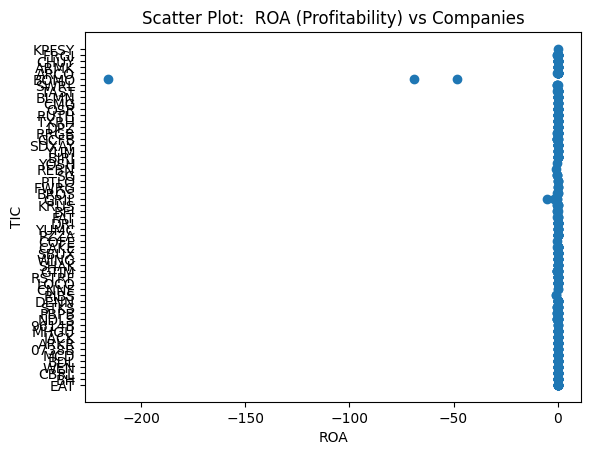

In [ ]:
# Extract the 'roa' and 'tic' columns
roa = df['roa']
tic = df['tic']

# Plot the scatter plot
plt.scatter(roa, tic)
plt.xlabel('ROA')
plt.ylabel('TIC')
plt.title('Scatter Plot:  ROA (Profitability) vs Companies')
plt.show()

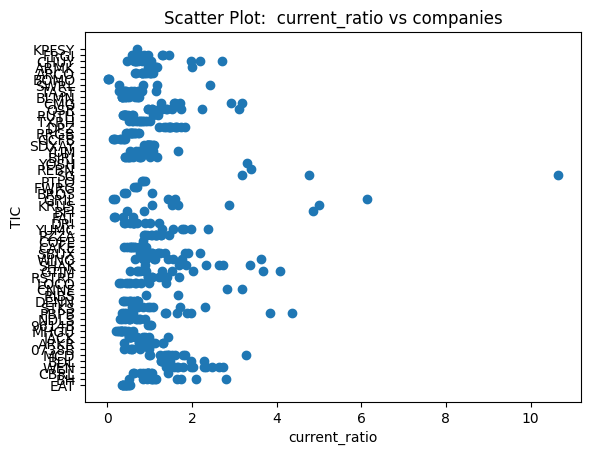

In [ ]:
# Extract the 'roa' and 'tic' columns
current_ratio = df['current_ratio']

# Plot the scatter plot
plt.scatter(current_ratio, tic)
plt.xlabel('current_ratio')
plt.ylabel('TIC')
plt.title('Scatter Plot:  current_ratio vs companies')
plt.show()

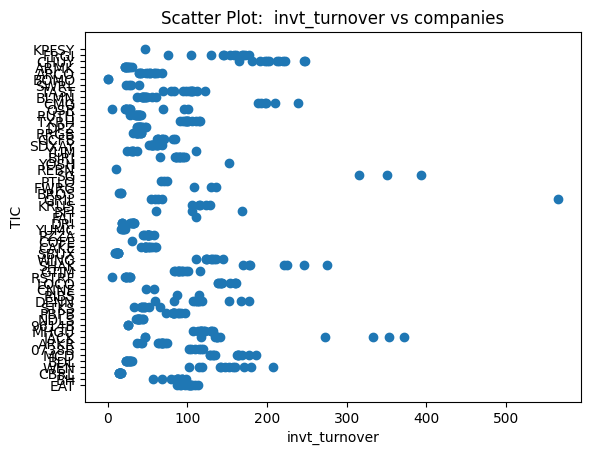

In [ ]:
# Extract the 'roa' and 'tic' columns
invt_turnover = df['invt_turnover']

# Plot the scatter plot
plt.scatter(invt_turnover, tic)
plt.xlabel('invt_turnover')
plt.ylabel('TIC')
plt.title('Scatter Plot:  invt_turnover vs companies')
plt.show()

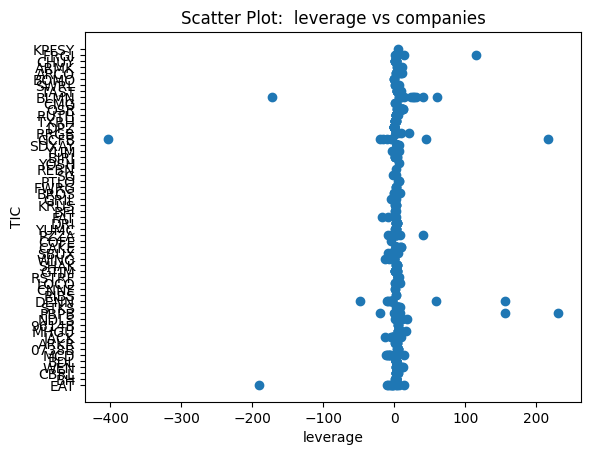

In [ ]:
# Extract the 'roa' and 'tic' columns
leverage = df['leverage']

# Plot the scatter plot
plt.scatter(leverage, tic)
plt.xlabel('leverage')
plt.ylabel('TIC')
plt.title('Scatter Plot:  leverage vs companies')
plt.show()

We can see that there are outliers in every ratio.

The 50% quartile represents median.

Median:
roa               0.05
current_ratio     0.89
invt_turnover    68.21
leverage          2.49

Mean:
roa             -0.67
current_ratio    1.09
invt_turnover     inf
leverage         3.30


In [ ]:
# Descriptive statistics by years (median only)
df.groupby('fyear').median()[['roa', 'current_ratio', 'invt_turnover', 'leverage']]

,roa,current_ratio,invt_turnover,leverage
fyear,,,,
2011,0.060310,0.940488,74.125613,2.718257
2012,0.055378,1.002861,69.757839,2.590684
2013,0.041027,0.854893,68.384988,2.828111
2014,0.053698,0.882246,58.998522,2.612052
2015,0.068077,0.854120,63.558745,2.149257
2016,0.059783,0.791849,66.454782,2.295329
2017,0.061161,0.831333,68.921509,2.158543
2018,0.046785,0.843517,65.266865,1.946982
2019,0.042480,0.719468,63.789822,2.395670


In [ ]:
# Descriptive statistics by years (mean only)
df.groupby('fyear').mean()[['roa', 'current_ratio', 'invt_turnover', 'leverage']]

,roa,current_ratio,invt_turnover,leverage
fyear,,,,
2011,0.062477,1.104644,78.167626,-0.630001
2012,0.059118,1.148542,76.123527,11.883445
2013,-5.796245,1.122757,74.576542,-4.019588
2014,-1.692517,1.115024,72.803316,3.937407
2015,0.053348,0.995361,77.621541,-2.774241
2016,0.063790,0.905558,NaN,2.950646
2017,0.070380,0.912188,NaN,2.084564
2018,0.020010,0.940073,80.149740,3.221010
2019,-0.072872,0.961657,92.889433,2.732562


ROA (Profitability), Current Ratio (Liquidity), Inventory Turnover (Asset management), and Leverage (Debt management):

Return on Assets (ROA) is the income generated for common shareholders foreach dollar of assets invested in the business. For average of any variable, we take rolling mean or the moving average.

Current ratio measures the ability of current assets to be used to meet short term obligations.
A current ratio greater than 1 implies positive net working capital.

Inventory Turnover measures speed with which inventory moves through operations. Shows number of times a company sells and replaces its inventory during a period.
Higher is better.

Leverage Ratio (Equity Multiplier Ratio) conveys how reliant a company is on liabilities for financing compared with equity financing. Higher leverage ratio indicates more leverage and more risk.

The table provides the descriptive statistics for the four ratios (ROA (Profitability), Current Ratio(Liquidity), Inventory Turnover (Asset management) and Leverage (Debt management)) with the whole sample and present count, mean, median, and quartiles. ‘50%’ quartile means Median.

We can see that Inventory turnover has Infinite maximum and mean value.

since, the Inventory Turnover = Cost of Goods Sold (COGS) / Average Inventory (INVT)

This happens when Average Inventory (INVT) = 0.

___

 3. For each ratio create a separate plot with the dynamics of median and average ratio and provide comments on possible reasons for existence of significant changes during the period. What was the effect of COVID-19 on the ratios?

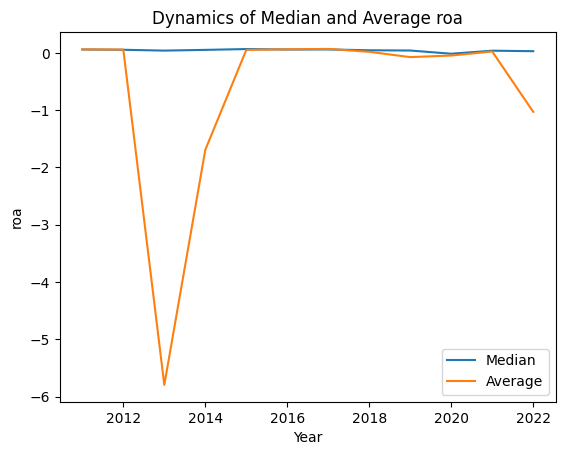

In [ ]:
# median and average ratios by year
yr_median = df.groupby('fyear').median()
yr_mean = df.groupby('fyear').mean()

plt.plot(yr_median.index, yr_median['roa'], label='Median')
plt.plot(yr_mean.index, yr_mean['roa'], label='Average')
plt.xlabel('Year')
plt.ylabel('roa')
plt.title("Dynamics of Median and Average roa")
plt.legend()
plt.show()

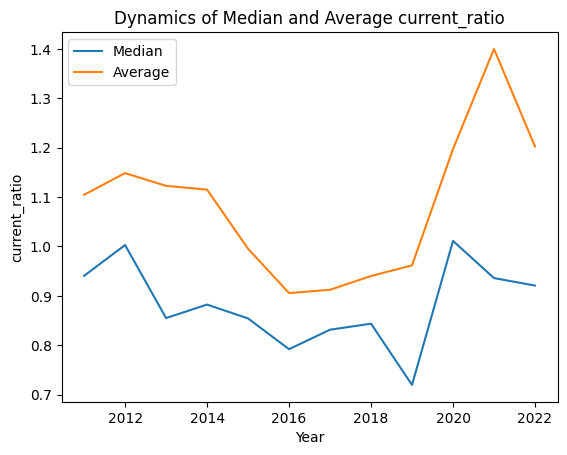

In [ ]:
plt.plot(yr_median.index, yr_median['current_ratio'], label='Median')
plt.plot(yr_mean.index, yr_mean['current_ratio'], label='Average')
plt.xlabel('Year')
plt.ylabel('current_ratio')
plt.title("Dynamics of Median and Average current_ratio")
plt.legend()
plt.show()

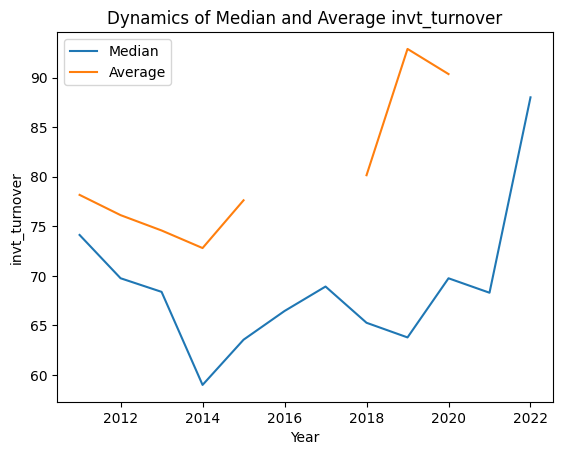

In [ ]:
plt.plot(yr_median.index, yr_median['invt_turnover'], label='Median')
plt.plot(yr_mean.index, yr_mean['invt_turnover'], label='Average')
plt.xlabel('Year')
plt.ylabel('invt_turnover')
plt.title("Dynamics of Median and Average invt_turnover")
plt.legend()
plt.show()

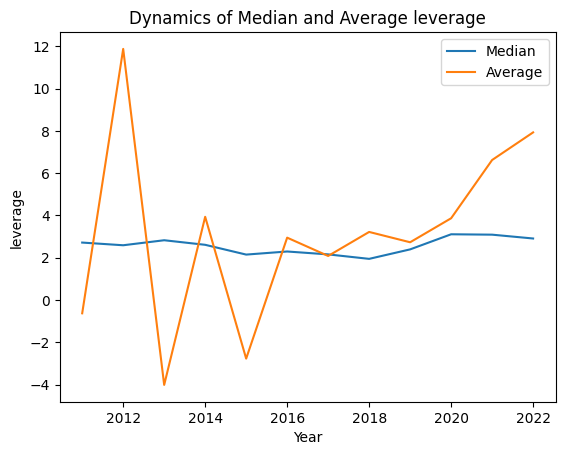

In [ ]:
plt.plot(yr_median.index, yr_median['leverage'], label='Median')
plt.plot(yr_mean.index, yr_mean['leverage'], label='Average')
plt.xlabel('Year')
plt.ylabel('leverage')
plt.title("Dynamics of Median and Average leverage")
plt.legend()
plt.show()

These plots show the dynamics of the median and average values for Inventory Turnover and Leverage. We can see the fluctuating nature of the median and average values for Inventory Turnover and Leverage over the years.


The possible reasons for significant changes during the observed period (2011-2022) are likely the after-effects of Global Financial Recession of 2008-09 and COVID-19.

Several factors can influence these ratios over time, including economic conditions, industry trends, and company-specific factors.

During a period of economic growth and stability, companies benefit from higher sales and more efficient asset utilization.

During economic downturns or periods of financial distress, sales and profitability decline.

During COVID-19, leverage increased, ROA decreased, Inventory turnover increased and also the current ratio increased.

 4. Identify 2 companies with different strategies of generating ROA within your sample (for year 2021 or 2018). Hint: You will need to calculate Asset Turnover Ratio and Profit Margin to do this. Describe main differences. How are these companies financed?

In [ ]:
df2021 = df[df['fyear'] == 2021]
df2021

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,cik,costat,sic,avg_asset,roa,current_ratio,avg_invt,invt_turnover,avg_ceq,leverage
11,3007,2021-06-30,2021,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,703351,A,5812,2315.4500,0.056836,0.362491,28.1000,100.871886,-391.2000,-5.918839
24,3424,2021-12-31,2021,INDL,C,D,STD,BH,08986R309,BIGLARI HOLDINGS INC,...,1726173,A,5812,956.3875,0.037096,1.147367,3.2700,68.296636,576.2620,1.659640
37,3570,2021-07-31,2021,INDL,C,D,STD,CBRL,22410J106,CRACKER BARREL OLD CTRY STOR,...,1067294,A,5812,2467.9760,0.103126,0.759993,138.7055,17.429677,541.0110,4.561785
50,3708,2021-12-31,2021,INDL,C,D,STD,WEN,95058W100,WENDY'S CO,...,30697,A,5812,5070.6985,0.039520,1.388649,5.3330,114.697169,493.0005,10.285382
63,4759,2021-09-30,2021,INDL,C,D,STD,BDL,338517105,FLANIGANS ENTERPRISES INC,...,12040,A,5812,120.2430,0.098002,1.967562,3.9535,27.393449,45.3230,2.653024
76,7154,2021-12-31,2021,INDL,C,D,STD,MCD,580135101,MCDONALD'S CORP,...,63908,A,5812,53240.5500,0.141719,1.778234,53.3500,176.976570,-6212.9500,-8.569287
96,11872,2021-09-30,2021,INDL,C,D,STD,ARKR,040712101,ARK RESTAURANTS CORP,...,779544,A,5812,157.2660,0.081995,1.081128,3.0315,37.050965,43.4695,3.617847
109,13092,2021-09-30,2021,INDL,C,D,STD,JACK,466367109,JACK IN THE BOX INC,...,807882,A,5812,1828.3155,0.090660,0.513447,2.0715,353.403331,-805.6215,-2.269447
122,13759,2021-12-31,2021,INDL,C,D,STD,MHGU,59000K309,MERITAGE HOSPITALITY GROUP,...,808219,A,5812,724.2785,0.024086,0.612619,4.0120,120.700897,100.7665,7.187691
144,18047,2021-12-31,2021,INDL,C,D,STD,NDLS,65540B105,NOODLES & CO,...,1275158,A,5812,347.5450,0.010545,0.294612,9.5235,41.274216,33.6660,10.323323


# Asset Turnover = Net Sales / Average Total Assets

In [ ]:
#Calculate atr
df2021['atr'] = (df2021.sale/df2021.avg_asset)
df2021

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,costat,sic,avg_asset,roa,current_ratio,avg_invt,invt_turnover,avg_ceq,leverage,atr
11,3007,2021-06-30,2021,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,A,5812,2315.4500,0.056836,0.362491,28.1000,100.871886,-391.2000,-5.918839,1.441534
24,3424,2021-12-31,2021,INDL,C,D,STD,BH,08986R309,BIGLARI HOLDINGS INC,...,A,5812,956.3875,0.037096,1.147367,3.2700,68.296636,576.2620,1.659640,0.382801
37,3570,2021-07-31,2021,INDL,C,D,STD,CBRL,22410J106,CRACKER BARREL OLD CTRY STOR,...,A,5812,2467.9760,0.103126,0.759993,138.7055,17.429677,541.0110,4.561785,1.143222
50,3708,2021-12-31,2021,INDL,C,D,STD,WEN,95058W100,WENDY'S CO,...,A,5812,5070.6985,0.039520,1.388649,5.3330,114.697169,493.0005,10.285382,0.374110
63,4759,2021-09-30,2021,INDL,C,D,STD,BDL,338517105,FLANIGANS ENTERPRISES INC,...,A,5812,120.2430,0.098002,1.967562,3.9535,27.393449,45.3230,2.653024,1.141913
76,7154,2021-12-31,2021,INDL,C,D,STD,MCD,580135101,MCDONALD'S CORP,...,A,5812,53240.5500,0.141719,1.778234,53.3500,176.976570,-6212.9500,-8.569287,0.436188
96,11872,2021-09-30,2021,INDL,C,D,STD,ARKR,040712101,ARK RESTAURANTS CORP,...,A,5812,157.2660,0.081995,1.081128,3.0315,37.050965,43.4695,3.617847,0.838516
109,13092,2021-09-30,2021,INDL,C,D,STD,JACK,466367109,JACK IN THE BOX INC,...,A,5812,1828.3155,0.090660,0.513447,2.0715,353.403331,-805.6215,-2.269447,0.625532
122,13759,2021-12-31,2021,INDL,C,D,STD,MHGU,59000K309,MERITAGE HOSPITALITY GROUP,...,A,5812,724.2785,0.024086,0.612619,4.0120,120.700897,100.7665,7.187691,0.796830
144,18047,2021-12-31,2021,INDL,C,D,STD,NDLS,65540B105,NOODLES & CO,...,A,5812,347.5450,0.010545,0.294612,9.5235,41.274216,33.6660,10.323323,1.367167


# Net Profit Margin = (Net Inc – Pref Divs) / Net Sales

In [ ]:
#Calculate PMR for each company-year
df2021['pmr'] = df2021.ni/df2021.sale

df2021 = df2021.dropna()

df2021

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,sic,avg_asset,roa,current_ratio,avg_invt,invt_turnover,avg_ceq,leverage,atr,pmr
11,3007,2021-06-30,2021,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,5812,2315.4500,0.056836,0.362491,28.1000,100.871886,-391.2000,-5.918839,1.441534,0.039427
24,3424,2021-12-31,2021,INDL,C,D,STD,BH,08986R309,BIGLARI HOLDINGS INC,...,5812,956.3875,0.037096,1.147367,3.2700,68.296636,576.2620,1.659640,0.382801,0.096906
37,3570,2021-07-31,2021,INDL,C,D,STD,CBRL,22410J106,CRACKER BARREL OLD CTRY STOR,...,5812,2467.9760,0.103126,0.759993,138.7055,17.429677,541.0110,4.561785,1.143222,0.090207
50,3708,2021-12-31,2021,INDL,C,D,STD,WEN,95058W100,WENDY'S CO,...,5812,5070.6985,0.039520,1.388649,5.3330,114.697169,493.0005,10.285382,0.374110,0.105636
63,4759,2021-09-30,2021,INDL,C,D,STD,BDL,338517105,FLANIGANS ENTERPRISES INC,...,5812,120.2430,0.098002,1.967562,3.9535,27.393449,45.3230,2.653024,1.141913,0.085822
76,7154,2021-12-31,2021,INDL,C,D,STD,MCD,580135101,MCDONALD'S CORP,...,5812,53240.5500,0.141719,1.778234,53.3500,176.976570,-6212.9500,-8.569287,0.436188,0.324903
96,11872,2021-09-30,2021,INDL,C,D,STD,ARKR,040712101,ARK RESTAURANTS CORP,...,5812,157.2660,0.081995,1.081128,3.0315,37.050965,43.4695,3.617847,0.838516,0.097786
109,13092,2021-09-30,2021,INDL,C,D,STD,JACK,466367109,JACK IN THE BOX INC,...,5812,1828.3155,0.090660,0.513447,2.0715,353.403331,-805.6215,-2.269447,0.625532,0.144933
122,13759,2021-12-31,2021,INDL,C,D,STD,MHGU,59000K309,MERITAGE HOSPITALITY GROUP,...,5812,724.2785,0.024086,0.612619,4.0120,120.700897,100.7665,7.187691,0.796830,0.030227
144,18047,2021-12-31,2021,INDL,C,D,STD,NDLS,65540B105,NOODLES & CO,...,5812,347.5450,0.010545,0.294612,9.5235,41.274216,33.6660,10.323323,1.367167,0.007713


# Companies having lowest Asset Turnover

In [ ]:
df2021 = df2021.sort_values('atr')
df2021.head(10)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,sic,avg_asset,roa,current_ratio,avg_invt,invt_turnover,avg_ceq,leverage,atr,pmr
335,32592,2021-12-31,2021,INDL,C,D,STD,FAT,30258N105,FAT BRANDS INC,...,5812,649.6340,-0.048617,0.597069,0.0000,inf,-37.6535,-17.252951,0.182997,-0.265669
341,33138,2021-12-31,2021,INDL,C,D,STD,BFI,12122L101,BURGERFI INTERNATIONAL INC,...,5812,303.4175,-0.400419,0.872298,0.8275,60.911178,216.1750,1.403573,0.226971,-1.764183
504,164471,2021-12-31,2021,INDL,C,D,STD,QSR,76131D103,RESTAURANT BRANDS INTL INC,...,5812,23011.5000,0.036417,0.966986,96.0000,23.020833,2202.0000,10.450272,0.249397,0.146018
214,22402,2021-12-31,2021,INDL,C,D,STD,RSTRF,76090H103,RESTAURANT BRANDS INTL LP,...,5812,23011.5000,0.054277,0.966986,96.0000,23.020833,3783.5000,6.082067,0.249397,0.217634
50,3708,2021-12-31,2021,INDL,C,D,STD,WEN,95058W100,WENDY'S CO,...,5812,5070.6985,0.039520,1.388649,5.3330,114.697169,493.0005,10.285382,0.374110,0.105636
24,3424,2021-12-31,2021,INDL,C,D,STD,BH,08986R309,BIGLARI HOLDINGS INC,...,5812,956.3875,0.037096,1.147367,3.2700,68.296636,576.2620,1.659640,0.382801,0.096906
76,7154,2021-12-31,2021,INDL,C,D,STD,MCD,580135101,MCDONALD'S CORP,...,5812,53240.5500,0.141719,1.778234,53.3500,176.976570,-6212.9500,-8.569287,0.436188,0.324903
347,35423,2021-08-31,2021,INDL,C,D,STD,KRUS,501270102,KURA SUSHI USA INC,...,5812,148.0240,-0.069550,2.866663,0.5500,116.209091,68.2785,2.167945,0.438382,-0.158651
353,35967,2021-12-31,2021,INDL,C,D,STD,GRIL,627333107,MUSCLE MAKER INC,...,5812,19.9680,-0.409455,6.135200,0.1865,58.954424,15.0940,1.322910,0.518329,-0.789952
370,39756,2021-12-31,2021,INDL,C,D,STD,PTLO,73642K106,PORTILLO'S INC,...,5812,954.8975,0.006275,0.881667,5.5765,70.451000,155.9865,6.121668,0.560219,0.011201


# Companies having highest Asset Turnover

In [ ]:
df2021.tail(10)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,sic,avg_asset,roa,current_ratio,avg_invt,invt_turnover,avg_ceq,leverage,atr,pmr
362,39483,2021-12-31,2021,INDL,C,D,STD,BROS,26701L100,DUTCH BROS INC,...,5812,406.6795,-0.200443,0.430786,19.4625,16.452614,-683.1430,-0.595307,1.224247,-0.163728
530,171049,2021-12-31,2021,INDL,C,D,STD,BLMN,094235108,BLOOMIN' BRANDS INC,...,5812,3328.1890,0.064766,0.358301,70.5200,47.164521,110.3030,30.173150,1.237686,0.052329
166,18978,2021-12-31,2021,INDL,C,D,STD,STKS,88338K103,ONE GP HOSPITALITY (THE),...,5812,222.7020,0.140762,1.015687,3.2025,66.197346,42.3065,5.264014,1.244614,0.113097
227,22543,2021-09-30,2021,INDL,C,D,STD,GTIM,382140879,GOOD TIMES RESTAURANTS INC,...,5812,96.6870,0.173622,0.888096,1.1980,84.278798,21.7180,4.451929,1.282003,0.135430
144,18047,2021-12-31,2021,INDL,C,D,STD,NDLS,65540B105,NOODLES & CO,...,5812,347.5450,0.010545,0.294612,9.5235,41.274216,33.6660,10.323323,1.367167,0.007713
156,18839,2021-12-31,2021,INDL,C,D,STD,PBPB,73754Y100,POTBELLY CORP,...,5812,268.2970,-0.088648,0.401460,3.2400,89.937963,1.7240,155.624710,1.416535,-0.062581
478,160376,2021-12-31,2021,INDL,C,D,STD,TXRH,882681109,TEXAS ROADHOUSE INC,...,5812,2418.5565,0.101422,0.935864,26.9795,105.956152,992.8145,2.436061,1.432237,0.070813
11,3007,2021-06-30,2021,INDL,C,D,STD,EAT,109641100,BRINKER INTL INC,...,5812,2315.4500,0.056836,0.362491,28.1000,100.871886,-391.2000,-5.918839,1.441534,0.039427
302,28397,2021-12-31,2021,INDL,C,D,STD,PZZA,698813102,PAPA JOHNS INTERNATIONAL INC,...,5812,879.2370,0.136500,0.887222,32.6230,50.421942,-234.9240,-3.742644,2.352518,0.058023
465,160211,2021-12-31,2021,INDL,C,D,STD,DPZ,25754A201,DOMINO'S PIZZA INC,...,5812,1619.4920,0.315202,1.456713,67.5055,38.459207,-3754.9705,-0.431293,2.690580,0.117150


# Companies having lowest Profit Margin

In [ ]:
df2021 = df2021.sort_values('pmr')
df2021.head(10)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,sic,avg_asset,roa,current_ratio,avg_invt,invt_turnover,avg_ceq,leverage,atr,pmr
341,33138,2021-12-31,2021,INDL,C,D,STD,BFI,12122L101,BURGERFI INTERNATIONAL INC,...,5812,303.4175,-0.400419,0.872298,0.8275,60.911178,216.1750,1.403573,0.226971,-1.764183
353,35967,2021-12-31,2021,INDL,C,D,STD,GRIL,627333107,MUSCLE MAKER INC,...,5812,19.9680,-0.409455,6.135200,0.1865,58.954424,15.0940,1.322910,0.518329,-0.789952
379,39961,2021-12-31,2021,INDL,C,D,STD,SG,87043Q108,SWEETGREEN INC,...,5812,514.1660,-0.297910,10.660158,0.7615,392.734077,172.8775,2.974164,0.661020,-0.450682
335,32592,2021-12-31,2021,INDL,C,D,STD,FAT,30258N105,FAT BRANDS INC,...,5812,649.6340,-0.048617,0.597069,0.0000,inf,-37.6535,-17.252951,0.182997,-0.265669
362,39483,2021-12-31,2021,INDL,C,D,STD,BROS,26701L100,DUTCH BROS INC,...,5812,406.6795,-0.200443,0.430786,19.4625,16.452614,-683.1430,-0.595307,1.224247,-0.163728
347,35423,2021-08-31,2021,INDL,C,D,STD,KRUS,501270102,KURA SUSHI USA INC,...,5812,148.0240,-0.069550,2.866663,0.5500,116.209091,68.2785,2.167945,0.438382,-0.158651
156,18839,2021-12-31,2021,INDL,C,D,STD,PBPB,73754Y100,POTBELLY CORP,...,5812,268.2970,-0.088648,0.401460,3.2400,89.937963,1.7240,155.624710,1.416535,-0.062581
452,148470,2021-12-31,2021,INDL,C,D,STD,RRGB,75689M101,RED ROBIN GOURMET BURGERS,...,5812,951.8685,-0.052530,0.457483,24.5105,39.783358,98.8435,9.630057,1.220839,-0.043028
543,176249,2021-12-31,2021,INDL,C,D,STD,TAST,14574X104,CARROLS RESTAURANT GROUP INC,...,5812,1722.0745,-0.024987,0.405330,12.8090,111.644469,242.8780,7.090286,0.959523,-0.026041
238,22672,2021-12-31,2021,INDL,C,D,STD,SHAK,819047101,SHAKE SHACK INC,...,5812,1301.4590,-0.006650,3.371902,3.3690,176.858415,408.4260,3.186523,0.568510,-0.011698


# Companies having highest Profit Margin

In [ ]:
df2021.tail(10)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,sic,avg_asset,roa,current_ratio,avg_invt,invt_turnover,avg_ceq,leverage,atr,pmr
166,18978,2021-12-31,2021,INDL,C,D,STD,STKS,88338K103,ONE GP HOSPITALITY (THE),...,5812,222.7020,0.140762,1.015687,3.2025,66.197346,42.3065,5.264014,1.244614,0.113097
465,160211,2021-12-31,2021,INDL,C,D,STD,DPZ,25754A201,DOMINO'S PIZZA INC,...,5812,1619.4920,0.315202,1.456713,67.5055,38.459207,-3754.9705,-0.431293,2.690580,0.117150
227,22543,2021-09-30,2021,INDL,C,D,STD,GTIM,382140879,GOOD TIMES RESTAURANTS INC,...,5812,96.6870,0.173622,0.888096,1.1980,84.278798,21.7180,4.451929,1.282003,0.135430
273,25434,2021-09-30,2021,INDL,C,D,STD,SBUX,855244109,STARBUCKS CORP,...,5812,30383.5500,0.138210,1.196899,1577.6500,13.462492,-6563.1500,-4.629416,0.956458,0.144501
109,13092,2021-09-30,2021,INDL,C,D,STD,JACK,466367109,JACK IN THE BOX INC,...,5812,1828.3155,0.090660,0.513447,2.0715,353.403331,-805.6215,-2.269447,0.625532,0.144933
504,164471,2021-12-31,2021,INDL,C,D,STD,QSR,76131D103,RESTAURANT BRANDS INTL INC,...,5812,23011.5000,0.036417,0.966986,96.0000,23.020833,2202.0000,10.450272,0.249397,0.146018
248,23843,2021-12-31,2021,INDL,C,D,STD,WING,974155103,WINGSTOP INC,...,5812,230.3840,0.185160,1.767823,0.4400,130.490909,-325.4175,-0.707964,1.196272,0.154781
179,19398,2021-12-31,2021,INDL,C,D,STD,DENN,24869P104,DENNYS CORP,...,5812,433.2380,0.180208,0.710086,3.1205,82.737382,-97.8555,-4.427324,0.919065,0.196078
214,22402,2021-12-31,2021,INDL,C,D,STD,RSTRF,76090H103,RESTAURANT BRANDS INTL LP,...,5812,23011.5000,0.054277,0.966986,96.0000,23.020833,3783.5000,6.082067,0.249397,0.217634
76,7154,2021-12-31,2021,INDL,C,D,STD,MCD,580135101,MCDONALD'S CORP,...,5812,53240.5500,0.141719,1.778234,53.3500,176.976570,-6212.9500,-8.569287,0.436188,0.324903


## Comparing ROA Strategies
Two companies within our sample that have different strategies for generating ROA. To do this, we will calculate the Asset Turnover Ratio and Profit Margin.

This is the DuPont analysis (ROA Disaggregation):

ROA = Asset Turnover Ratio (ATR) + Net Profit Margin (PMR)

DuPont Decomposition is useful for understanding of how companies differ in generating ROA:

• Focus on increasing profit margin ratio (consumption):• Branded products• Affected by expense ratios

• Focus on increasing asset turnover ratio (production):• high volume of sales revenues relative to assets

Asset Turnover Ratio measures the amount of sales generated from a firm’s assets. All else equal, higher asset turnover ratio suggests that assets are being used more efficiently.

The table shows the Companies having lowest Asset Turnover in 2021. We can see that some of the companies are Fat Brands, Wendy’s, MacDonald’s, etc. So, assets are not being used more efficiently for these companies.

The table shows the Companies having highest Asset Turnover in 2021. Higher asset turnover ratio suggests that assets are being used more efficiently for these companies. We can see that some of the companies are Papa Johns, Domino’s, etc.

Profit Margin Ratio is income attributable to common shareholders divided by net sales (net revenues). Higher value is better.


The table shows the Companies having lowest Profit Margin in 2021. We can see that some of the companies are Fat Brands, Dutch Bros, Shake Shack etc. So, their profit is not good.


The table shows the Companies having highest Profit Margin in 2021. We can see that some of the companies are MacDonald’s, Domino’s, Starbucks, etc. So, their profit margin is good and these companies are operating in a way to earn more revenue than the cost.

Therefore, the 2 companies with different strategies of generating ROA within sample for year 2021 are Papa Johns and Starbucks.

The main difference about strategy and financing is that Papa John’s focused on increasing asset turnover ratio (production) and has high volume of sales revenues relative to assets;

while Starbucks focused on increasing profit margin ratio (consumption) and has Branded products and it is affected by expense ratios.

___

## Section 2.6 Textual Analysis

 1. For years 2020-2022 count the number of COVID-19-related words: "covid-19", "covid", "coronavirus", "pandemic" for each 10-K using Python.

### MCDONALD'S CORP (CIK: 63908) 2020

In [ ]:
import re
import pandas as pd

data = pd.DataFrame(columns=["Year", "Company", "Count_covid-19", "Count_covid", "Count_coronavirus", "Count_pandemic"])

# Read the relevant SEC text file for the year 2020
with open("MCD-2021.txt", "r") as file:
    sec_text = file.read()

# Define the COVID-19 related keywords
keywords = ["covid-19", "covid", "coronavirus", "pandemic"]

# Count COVID-19-related words in the entire SEC text file
counts = {}
for keyword in keywords:
    count = len(re.findall(r"\b{}\b".format(keyword), sec_text, re.IGNORECASE))
    counts[keyword] = count

# Print the individual counts
for keyword, count in counts.items():
    print("Count of '{}' in the entire SEC text file is: {}".format(keyword, count))

# Add a row to the dataframe
data = data.append({"Year": 2020,
                    "Company": "MCDONALDS CORP",
                    "Count_covid-19": counts.get("covid-19", 0),
                    "Count_covid": counts.get("covid", 0),
                    "Count_coronavirus": counts.get("coronavirus", 0),
                    "Count_pandemic": counts.get("pandemic", 0)},
                   ignore_index=True)

data

Count of 'covid-19' in the entire SEC text file is: 62
Count of 'covid' in the entire SEC text file is: 62
Count of 'coronavirus' in the entire SEC text file is: 0
Count of 'pandemic' in the entire SEC text file is: 14


,Year,Company,Count_covid-19,Count_covid,Count_coronavirus,Count_pandemic
0,2020,MCDONALDS CORP,62,62,0,14


### MCDONALD'S CORP (CIK: 63908) 2021

In [ ]:
import re

# Read the relevant SEC text file for the year 2020
with open("MCD-2022.txt", "r") as file:
    sec_text = file.read()

# Define the COVID-19 related keywords
keywords = ["covid-19", "covid", "coronavirus", "pandemic"]

# Count COVID-19-related words in the entire SEC text file
counts = {}
for keyword in keywords:
    count = len(re.findall(r"\b{}\b".format(keyword), sec_text, re.IGNORECASE))
    counts[keyword] = count

# Print the individual counts
for keyword, count in counts.items():
    print("Count of '{}' in the entire SEC text file is: {}".format(keyword, count))

# Add a row to the dataframe
data = data.append({"Year": 2021,
                    "Company": "MCDONALDS CORP",
                    "Count_covid-19": counts.get("covid-19", 0),
                    "Count_covid": counts.get("covid", 0),
                    "Count_coronavirus": counts.get("coronavirus", 0),
                    "Count_pandemic": counts.get("pandemic", 0)},
                   ignore_index=True)

data

Count of 'covid-19' in the entire SEC text file is: 41
Count of 'covid' in the entire SEC text file is: 42
Count of 'coronavirus' in the entire SEC text file is: 0
Count of 'pandemic' in the entire SEC text file is: 11


,Year,Company,Count_covid-19,Count_covid,Count_coronavirus,Count_pandemic
0,2020,MCDONALDS CORP,62,62,0,14
1,2021,MCDONALDS CORP,41,42,0,11


### MCDONALD'S CORP (CIK: 63908) 2022

In [ ]:
import re

# Read the relevant SEC text file for the year 2020
with open("MCD-2023.txt", "r") as file:
    sec_text = file.read()

# Define the COVID-19 related keywords
keywords = ["covid-19", "covid", "coronavirus", "pandemic"]

# Count COVID-19-related words in the entire SEC text file
counts = {}
for keyword in keywords:
    count = len(re.findall(r"\b{}\b".format(keyword), sec_text, re.IGNORECASE))
    counts[keyword] = count

# Print the individual counts
for keyword, count in counts.items():
    print("Count of '{}' in the entire SEC text file is: {}".format(keyword, count))

# Add a row to the dataframe
data = data.append({"Year": 2022,
                    "Company": "MCDONALDS CORP",
                    "Count_covid-19": counts.get("covid-19", 0),
                    "Count_covid": counts.get("covid", 0),
                    "Count_coronavirus": counts.get("coronavirus", 0),
                    "Count_pandemic": counts.get("pandemic", 0)},
                   ignore_index=True)

data

Count of 'covid-19' in the entire SEC text file is: 23
Count of 'covid' in the entire SEC text file is: 23
Count of 'coronavirus' in the entire SEC text file is: 0
Count of 'pandemic' in the entire SEC text file is: 4


,Year,Company,Count_covid-19,Count_covid,Count_coronavirus,Count_pandemic
0,2020,MCDONALDS CORP,62,62,0,14
1,2021,MCDONALDS CORP,41,42,0,11
2,2022,MCDONALDS CORP,23,23,0,4


### WENDY'S CO (CIK: 30697) 2020

In [ ]:
import re

# Read the relevant SEC text file for the year 2020
with open("WEN-2021.txt", "r") as file:
    sec_text = file.read()

# Define the COVID-19 related keywords
keywords = ["covid-19", "covid", "coronavirus", "pandemic"]

# Count COVID-19-related words in the entire SEC text file
counts = {}
for keyword in keywords:
    count = len(re.findall(r"\b{}\b".format(keyword), sec_text, re.IGNORECASE))
    counts[keyword] = count

# Print the individual counts
for keyword, count in counts.items():
    print("Count of '{}' in the entire SEC text file is: {}".format(keyword, count))

# Add a row to the dataframe
data = data.append({"Year": 2020,
                    "Company": "WENDY'S CO",
                    "Count_covid-19": counts.get("covid-19", 0),
                    "Count_covid": counts.get("covid", 0),
                    "Count_coronavirus": counts.get("coronavirus", 0),
                    "Count_pandemic": counts.get("pandemic", 0)},
                   ignore_index=True)

data

Count of 'covid-19' in the entire SEC text file is: 105
Count of 'covid' in the entire SEC text file is: 105
Count of 'coronavirus' in the entire SEC text file is: 10
Count of 'pandemic' in the entire SEC text file is: 99


,Year,Company,Count_covid-19,Count_covid,Count_coronavirus,Count_pandemic
0,2020,MCDONALDS CORP,62,62,0,14
1,2021,MCDONALDS CORP,41,42,0,11
2,2022,MCDONALDS CORP,23,23,0,4
3,2020,WENDY'S CO,105,105,10,99


### WENDY'S CO (CIK: 30697) 2021

In [ ]:
import re

# Read the relevant SEC text file for the year 2020
with open("WEN-2022.txt", "r") as file:
    sec_text = file.read()

# Define the COVID-19 related keywords
keywords = ["covid-19", "covid", "coronavirus", "pandemic"]

# Count COVID-19-related words in the entire SEC text file
counts = {}
for keyword in keywords:
    count = len(re.findall(r"\b{}\b".format(keyword), sec_text, re.IGNORECASE))
    counts[keyword] = count

# Print the individual counts
for keyword, count in counts.items():
    print("Count of '{}' in the entire SEC text file is: {}".format(keyword, count))

# Add a row to the dataframe
data = data.append({"Year": 2021,
                    "Company": "WENDY'S CO",
                    "Count_covid-19": counts.get("covid-19", 0),
                    "Count_covid": counts.get("covid", 0),
                    "Count_coronavirus": counts.get("coronavirus", 0),
                    "Count_pandemic": counts.get("pandemic", 0)},
                   ignore_index=True)

data

Count of 'covid-19' in the entire SEC text file is: 75
Count of 'covid' in the entire SEC text file is: 75
Count of 'coronavirus' in the entire SEC text file is: 9
Count of 'pandemic' in the entire SEC text file is: 75


,Year,Company,Count_covid-19,Count_covid,Count_coronavirus,Count_pandemic
0,2020,MCDONALDS CORP,62,62,0,14
1,2021,MCDONALDS CORP,41,42,0,11
2,2022,MCDONALDS CORP,23,23,0,4
3,2020,WENDY'S CO,105,105,10,99
4,2021,WENDY'S CO,75,75,9,75


### WENDY'S CO (CIK: 30697) 2022

In [ ]:
import re

# Read the relevant SEC text file for the year 2020
with open("WEN-2023.txt", "r") as file:
    sec_text = file.read()

# Define the COVID-19 related keywords
keywords = ["covid-19", "covid", "coronavirus", "pandemic"]

# Count COVID-19-related words in the entire SEC text file
counts = {}
for keyword in keywords:
    count = len(re.findall(r"\b{}\b".format(keyword), sec_text, re.IGNORECASE))
    counts[keyword] = count

# Print the individual counts
for keyword, count in counts.items():
    print("Count of '{}' in the entire SEC text file is: {}".format(keyword, count))

# Add a row to the dataframe
data = data.append({"Year": 2022,
                    "Company": "WENDY'S CO",
                    "Count_covid-19": counts.get("covid-19", 0),
                    "Count_covid": counts.get("covid", 0),
                    "Count_coronavirus": counts.get("coronavirus", 0),
                    "Count_pandemic": counts.get("pandemic", 0)},
                   ignore_index=True)

data

Count of 'covid-19' in the entire SEC text file is: 16
Count of 'covid' in the entire SEC text file is: 16
Count of 'coronavirus' in the entire SEC text file is: 1
Count of 'pandemic' in the entire SEC text file is: 26


,Year,Company,Count_covid-19,Count_covid,Count_coronavirus,Count_pandemic
0,2020,MCDONALDS CORP,62,62,0,14
1,2021,MCDONALDS CORP,41,42,0,11
2,2022,MCDONALDS CORP,23,23,0,4
3,2020,WENDY'S CO,105,105,10,99
4,2021,WENDY'S CO,75,75,9,75
5,2022,WENDY'S CO,16,16,1,26


## 2. Calculate text readability and sentiment for each year.

### Text Readability for MCDONALD'S CORP (CIK: 63908) 2020

In [ ]:
import textstat
import pandas as pd

In [ ]:
# Read the relevant SEC text file for the year 2020
with open("MCD-2021.txt", "r") as file:
    sec_text = file.read()

# Calculate the readability metrics
gunning_fog = textstat.gunning_fog(sec_text)
flesch_reading_ease = textstat.flesch_reading_ease(sec_text)

print("Gunning Fog Index: {}".format(gunning_fog))
print("Flesch Reading Ease: {}".format(flesch_reading_ease))

readability_data = pd.DataFrame(columns=["Year", "Company", "Gunning Fog Index", "Flesch Reading Ease"])

# Append the data as a new row to the DataFrame
readability_data = readability_data.append({
    "Year": 2020,
    "Company": "MCDONALDS CORP",
    "Gunning Fog Index": gunning_fog,
    "Flesch Reading Ease": flesch_reading_ease}, ignore_index=True)

readability_data

Gunning Fog Index: 10.36
Flesch Reading Ease: 37.74


,Year,Company,Gunning Fog Index,Flesch Reading Ease
0,2020,MCDONALDS CORP,10.36,37.74


### Readability Metrics

#### Gunning Fog Index
- Measures how **complex** a text is to read.  
- Higher value → more difficult to read.  
- Typical university-level texts: **12–18**.  

#### Flesch Reading Ease
- Measures how **easy** a text is to read.  
- Higher value → easier to read.  
- **90–100** = Very easy (elementary level).  
- **0–30** = Very difficult (academic/scientific level).  


## Text Readability for MCDONALD'S CORP (CIK: 63908) 2021

In [ ]:
# Read the relevant SEC text file for the year 2020
with open("MCD-2022.txt", "r") as file:
    sec_text = file.read()

# Calculate the readability metrics
gunning_fog = textstat.gunning_fog(sec_text)
flesch_reading_ease = textstat.flesch_reading_ease(sec_text)

print("Gunning Fog Index: {}".format(gunning_fog))
print("Flesch Reading Ease: {}".format(flesch_reading_ease))

readability_data = readability_data.append({
    "Year": 2021,
    "Company": "MCDONALDS CORP",
    "Gunning Fog Index": gunning_fog,
    "Flesch Reading Ease": flesch_reading_ease}, ignore_index=True)

readability_data

Gunning Fog Index: 7.89
Flesch Reading Ease: 18.96


,Year,Company,Gunning Fog Index,Flesch Reading Ease
0,2020,MCDONALDS CORP,10.36,37.74
1,2021,MCDONALDS CORP,7.89,18.96


## Text Readability for MCDONALD'S CORP (CIK: 63908) 2022

In [ ]:
# Read the relevant SEC text file for the year 2020
with open("MCD-2023.txt", "r") as file:
    sec_text = file.read()

# Calculate the readability metrics
gunning_fog = textstat.gunning_fog(sec_text)
flesch_reading_ease = textstat.flesch_reading_ease(sec_text)

print("Gunning Fog Index: {}".format(gunning_fog))
print("Flesch Reading Ease: {}".format(flesch_reading_ease))

readability_data = readability_data.append({
    "Year": 2022,
    "Company": "MCDONALDS CORP",
    "Gunning Fog Index": gunning_fog,
    "Flesch Reading Ease": flesch_reading_ease}, ignore_index=True)

readability_data

Gunning Fog Index: 7.38
Flesch Reading Ease: 12.33


,Year,Company,Gunning Fog Index,Flesch Reading Ease
0,2020,MCDONALDS CORP,10.36,37.74
1,2021,MCDONALDS CORP,7.89,18.96
2,2022,MCDONALDS CORP,7.38,12.33


## Text Readability for WENDY'S CO (CIK: 30697) 2020

In [ ]:
# Read the relevant SEC text file for the year 2020
with open("WEN-2021.txt", "r") as file:
    sec_text = file.read()

# Calculate the readability metrics
gunning_fog = textstat.gunning_fog(sec_text)
flesch_reading_ease = textstat.flesch_reading_ease(sec_text)

print("Gunning Fog Index: {}".format(gunning_fog))
print("Flesch Reading Ease: {}".format(flesch_reading_ease))

readability_data = readability_data.append({
    "Year": 2020,
    "Company": "WENDY'S CO",
    "Gunning Fog Index": gunning_fog,
    "Flesch Reading Ease": flesch_reading_ease}, ignore_index=True)

readability_data

Gunning Fog Index: 12.57
Flesch Reading Ease: 15.04


,Year,Company,Gunning Fog Index,Flesch Reading Ease
0,2020,MCDONALDS CORP,10.36,37.74
1,2021,MCDONALDS CORP,7.89,18.96
2,2022,MCDONALDS CORP,7.38,12.33
3,2020,WENDY'S CO,12.57,15.04


## Text Readability for WENDY'S CO (CIK: 30697) 2021

In [ ]:
# Read the relevant SEC text file for the year 2020
with open("WEN-2022.txt", "r") as file:
    sec_text = file.read()

# Calculate the readability metrics
gunning_fog = textstat.gunning_fog(sec_text)
flesch_reading_ease = textstat.flesch_reading_ease(sec_text)

print("Gunning Fog Index: {}".format(gunning_fog))
print("Flesch Reading Ease: {}".format(flesch_reading_ease))

readability_data = readability_data.append({
    "Year": 2021,
    "Company": "WENDY'S CO",
    "Gunning Fog Index": gunning_fog,
    "Flesch Reading Ease": flesch_reading_ease}, ignore_index=True)

readability_data

Gunning Fog Index: 11.1
Flesch Reading Ease: 10.43


,Year,Company,Gunning Fog Index,Flesch Reading Ease
0,2020,MCDONALDS CORP,10.36,37.74
1,2021,MCDONALDS CORP,7.89,18.96
2,2022,MCDONALDS CORP,7.38,12.33
3,2020,WENDY'S CO,12.57,15.04
4,2021,WENDY'S CO,11.10,10.43


## Text Readability for WENDY'S CO (CIK: 30697) 2022

In [ ]:
# Read the relevant SEC text file for the year 2020
with open("WEN-2023.txt", "r") as file:
    sec_text = file.read()

# Calculate the readability metrics
gunning_fog = textstat.gunning_fog(sec_text)
flesch_reading_ease = textstat.flesch_reading_ease(sec_text)

print("Gunning Fog Index: {}".format(gunning_fog))
print("Flesch Reading Ease: {}".format(flesch_reading_ease))

readability_data = readability_data.append({
    "Year": 2022,
    "Company": "WENDY'S CO",
    "Gunning Fog Index": gunning_fog,
    "Flesch Reading Ease": flesch_reading_ease}, ignore_index=True)

readability_data

Gunning Fog Index: 9.41
Flesch Reading Ease: 14.9


,Year,Company,Gunning Fog Index,Flesch Reading Ease
0,2020,MCDONALDS CORP,10.36,37.74
1,2021,MCDONALDS CORP,7.89,18.96
2,2022,MCDONALDS CORP,7.38,12.33
3,2020,WENDY'S CO,12.57,15.04
4,2021,WENDY'S CO,11.10,10.43
5,2022,WENDY'S CO,9.41,14.90


# Sentiment Analysis

## Sentiment Analysis for MCDONALD'S CORP (CIK: 63908) 2020

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

In [ ]:
# Read the relevant SEC text file
with open("MCD-2021.txt", "r") as file:
    sec_text = file.read()

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Tokenize the text and remove stop words
tokens = word_tokenize(sec_text)
stop_words = set(stopwords.words("english"))
filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words]

# Perform sentiment analysis
positive_words = []
negative_words = []

for token in filtered_tokens:
    sentiment_scores = sia.polarity_scores(token)
    if sentiment_scores['compound'] >= 0.05:
        positive_words.append(token)
    elif sentiment_scores['compound'] <= -0.05:
        negative_words.append(token)

# Print positive and negative word counts
print("Positive Words Count: {}".format(len(positive_words)))
print("Negative Words Count: {}".format(len(negative_words)))

# Get the most frequent positive and negative words
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Print the most frequent positive words
print("\nMost Frequent Positive Words:")
for word, count in positive_word_counts.most_common(20):
    print("{}: {}".format(word, count))

# Print the most frequent negative words
print("\nMost Frequent Negative Words:")
for word, count in negative_word_counts.most_common(20):
    print("{}: {}".format(word, count))

sentiment_data = pd.DataFrame(columns=["Year", "Company", "Positive Words Count", "Negative Words Count", "Positive/Negative Ratio"])

sentiment_data = sentiment_data.append({
    "Year": 2020,
    "Company": "MCDONALDS CORP",
    "Positive Words Count": len(positive_words),
    "Negative Words Count": len(negative_words),
    "Positive/Negative Ratio": len(positive_words) / len(negative_words)}, ignore_index=True)

sentiment_data

Positive Words Count: 8302
Negative Words Count: 2540

Most Frequent Positive Words:
value: 714
assets: 637
credit: 608
fair: 556
interest: 337
shares: 251
share: 221
benefit: 219
certain: 213
ez: 213
asset: 207
gain: 192
effective: 163
outstanding: 145
benefits: 145
agreement: 145
significant: 139
number: 107
xd: 103
grant: 101

Most Frequent Negative Words:
debt: 461
liabilities: 401
loss: 338
liability: 184
losses: 102
limited: 81
block: 65
risk: 62
charges: 47
gross: 40
restricted: 36
adversely: 35
pay: 35
adverse: 35
risks: 33
po: 30
excluded: 28
lower: 27
affected: 24
pu: 23


,Year,Company,Positive Words Count,Negative Words Count,Positive/Negative Ratio
0,2020,MCDONALDS CORP,8302,2540,3.268504


## Sentiment Analysis for MCDONALD'S CORP (CIK: 63908) 2021

In [ ]:
# Read the relevant SEC text file
with open("MCD-2022.txt", "r") as file:
    sec_text = file.read()

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Tokenize the text and remove stop words
tokens = word_tokenize(sec_text)
stop_words = set(stopwords.words("english"))
filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words]

# Perform sentiment analysis
positive_words = []
negative_words = []

for token in filtered_tokens:
    sentiment_scores = sia.polarity_scores(token)
    if sentiment_scores['compound'] >= 0.05:
        positive_words.append(token)
    elif sentiment_scores['compound'] <= -0.05:
        negative_words.append(token)

# Print positive and negative word counts
print("Positive Words Count: {}".format(len(positive_words)))
print("Negative Words Count: {}".format(len(negative_words)))

# Get the most frequent positive and negative words
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Print the most frequent positive words
print("\nMost Frequent Positive Words:")
for word, count in positive_word_counts.most_common(20):
    print("{}: {}".format(word, count))

# Print the most frequent negative words
print("\nMost Frequent Negative Words:")
for word, count in negative_word_counts.most_common(20):
    print("{}: {}".format(word, count))

sentiment_data = sentiment_data.append({
    "Year": 2021,
    "Company": "MCDONALDS CORP",
    "Positive Words Count": len(positive_words),
    "Negative Words Count": len(negative_words),
    "Positive/Negative Ratio": len(positive_words) / len(negative_words)}, ignore_index=True)

sentiment_data

Positive Words Count: 7260
Negative Words Count: 2173

Most Frequent Positive Words:
value: 678
assets: 637
fair: 534
credit: 517
interest: 332
shares: 278
benefit: 252
certain: 194
asset: 178
gain: 176
share: 168
benefits: 165
effective: 145
significant: 141
outstanding: 126
number: 115
increase: 89
comprehensive: 88
well: 84
amortization: 84

Most Frequent Negative Words:
debt: 425
liabilities: 407
loss: 303
liability: 155
limited: 67
risk: 64
block: 53
losses: 51
charges: 40
adversely: 38
gross: 37
risks: 34
adverse: 31
restricted: 30
pay: 28
affected: 26
excluded: 23
death: 22
deficit: 15
disagreed: 15


,Year,Company,Positive Words Count,Negative Words Count,Positive/Negative Ratio
0,2020,MCDONALDS CORP,8302,2540,3.268504
1,2021,MCDONALDS CORP,7260,2173,3.341003


## Sentiment Analysis for MCDONALD'S CORP (CIK: 63908) 2022

In [ ]:
# Read the relevant SEC text file
with open("MCD-2023.txt", "r") as file:
    sec_text = file.read()

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Tokenize the text and remove stop words
tokens = word_tokenize(sec_text)
stop_words = set(stopwords.words("english"))
filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words]

# Perform sentiment analysis
positive_words = []
negative_words = []

for token in filtered_tokens:
    sentiment_scores = sia.polarity_scores(token)
    if sentiment_scores['compound'] >= 0.05:
        positive_words.append(token)
    elif sentiment_scores['compound'] <= -0.05:
        negative_words.append(token)

# Print positive and negative word counts
print("Positive Words Count: {}".format(len(positive_words)))
print("Negative Words Count: {}".format(len(negative_words)))

# Get the most frequent positive and negative words
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Print the most frequent positive words
print("\nMost Frequent Positive Words:")
for word, count in positive_word_counts.most_common(20):
    print("{}: {}".format(word, count))

# Print the most frequent negative words
print("\nMost Frequent Negative Words:")
for word, count in negative_word_counts.most_common(20):
    print("{}: {}".format(word, count))

sentiment_data = sentiment_data.append({
    "Year": 2022,
    "Company": "MCDONALDS CORP",
    "Positive Words Count": len(positive_words),
    "Negative Words Count": len(negative_words),
    "Positive/Negative Ratio": len(positive_words) / len(negative_words)}, ignore_index=True)

sentiment_data

Positive Words Count: 6954
Negative Words Count: 2117

Most Frequent Positive Words:
value: 575
assets: 505
fair: 440
d=: 372
interest: 278
shares: 238
credit: 220
benefit: 217
share: 211
benefits: 195
asset: 195
certain: 166
significant: 156
gain: 149
effective: 120
number: 112
outstanding: 104
comprehensive: 97
=d: 85
award: 82

Most Frequent Negative Words:
debt: 345
liabilities: 280
loss: 277
liability: 160
pay: 100
limited: 74
block: 53
risk: 49
charges: 49
losses: 43
gross: 41
affected: 40
adversely: 38
restricted: 36
risks: 32
adverse: 31
excluded: 22
demand: 17
lower: 16
disagreed: 15


,Year,Company,Positive Words Count,Negative Words Count,Positive/Negative Ratio
0,2020,MCDONALDS CORP,8302,2540,3.268504
1,2021,MCDONALDS CORP,7260,2173,3.341003
2,2022,MCDONALDS CORP,6954,2117,3.284837


## Sentiment Analysis for WENDY'S CO (CIK: 30697) 2020

In [ ]:
# Read the relevant SEC text file
with open("WEN-2021.txt", "r") as file:
    sec_text = file.read()

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Tokenize the text and remove stop words
tokens = word_tokenize(sec_text)
stop_words = set(stopwords.words("english"))
filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words]

# Perform sentiment analysis
positive_words = []
negative_words = []

for token in filtered_tokens:
    sentiment_scores = sia.polarity_scores(token)
    if sentiment_scores['compound'] >= 0.05:
        positive_words.append(token)
    elif sentiment_scores['compound'] <= -0.05:
        negative_words.append(token)

# Print positive and negative word counts
print("Positive Words Count: {}".format(len(positive_words)))
print("Negative Words Count: {}".format(len(negative_words)))

# Get the most frequent positive and negative words
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Print the most frequent positive words
print("\nMost Frequent Positive Words:")
for word, count in positive_word_counts.most_common(20):
    print("{}: {}".format(word, count))

# Print the most frequent negative words
print("\nMost Frequent Negative Words:")
for word, count in negative_word_counts.most_common(20):
    print("{}: {}".format(word, count))

sentiment_data = sentiment_data.append({
    "Year": 2020,
    "Company": "WENDY'S CO",
    "Positive Words Count": len(positive_words),
    "Negative Words Count": len(negative_words),
    "Positive/Negative Ratio": len(positive_words) / len(negative_words)}, ignore_index=True)

sentiment_data

Positive Words Count: 20376
Negative Words Count: 5201

Most Frequent Positive Words:
assets: 1579
credit: 1281
interest: 1056
trustee: 1044
value: 969
agreement: 745
fair: 649
respect: 628
securitization: 551
outstanding: 490
shares: 483
party: 449
amortization: 423
certain: 417
benefit: 398
share: 392
asset: 382
number: 363
respectively: 316
securities: 267

Most Frequent Negative Words:
liabilities: 700
loss: 637
debt: 464
restricted: 348
liability: 278
limited: 207
losses: 183
gross: 157
risk: 147
block: 135
charges: 128
pay: 126
adversely: 105
doubtful: 84
adverse: 77
failure: 70
affected: 64
risks: 54
demand: 47
charged: 47


,Year,Company,Positive Words Count,Negative Words Count,Positive/Negative Ratio
0,2020,MCDONALDS CORP,8302,2540,3.268504
1,2021,MCDONALDS CORP,7260,2173,3.341003
2,2022,MCDONALDS CORP,6954,2117,3.284837
3,2020,WENDY'S CO,20376,5201,3.917708


## Sentiment Analysis for WENDY'S CO (CIK: 30697) 2021

In [ ]:
# Read the relevant SEC text file
with open("WEN-2022.txt", "r") as file:
    sec_text = file.read()

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Tokenize the text and remove stop words
tokens = word_tokenize(sec_text)
stop_words = set(stopwords.words("english"))
filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words]

# Perform sentiment analysis
positive_words = []
negative_words = []

for token in filtered_tokens:
    sentiment_scores = sia.polarity_scores(token)
    if sentiment_scores['compound'] >= 0.05:
        positive_words.append(token)
    elif sentiment_scores['compound'] <= -0.05:
        negative_words.append(token)

# Print positive and negative word counts
print("Positive Words Count: {}".format(len(positive_words)))
print("Negative Words Count: {}".format(len(negative_words)))

# Get the most frequent positive and negative words
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Print the most frequent positive words
print("\nMost Frequent Positive Words:")
for word, count in positive_word_counts.most_common(20):
    print("{}: {}".format(word, count))

# Print the most frequent negative words
print("\nMost Frequent Negative Words:")
for word, count in negative_word_counts.most_common(20):
    print("{}: {}".format(word, count))

sentiment_data = sentiment_data.append({
    "Year": 2021,
    "Company": "WENDY'S CO",
    "Positive Words Count": len(positive_words),
    "Negative Words Count": len(negative_words),
    "Positive/Negative Ratio": len(positive_words) / len(negative_words)}, ignore_index=True)

sentiment_data

Positive Words Count: 12715
Negative Words Count: 4004

Most Frequent Positive Words:
assets: 1379
credit: 1046
value: 909
fair: 609
interest: 461
shares: 460
certain: 407
agreement: 374
share: 343
number: 335
amortization: 312
respectively: 286
asset: 274
outstanding: 221
benefit: 200
significant: 199
securities: 171
award: 171
awards: 163
optimization: 161

Most Frequent Negative Words:
liabilities: 614
loss: 536
debt: 428
restricted: 355
liability: 175
losses: 145
risk: 144
limited: 142
charges: 134
gross: 133
block: 128
adversely: 92
doubtful: 85
risks: 53
affected: 49
adverse: 43
pay: 42
demand: 40
failure: 37
litigation: 34


,Year,Company,Positive Words Count,Negative Words Count,Positive/Negative Ratio
0,2020,MCDONALDS CORP,8302,2540,3.268504
1,2021,MCDONALDS CORP,7260,2173,3.341003
2,2022,MCDONALDS CORP,6954,2117,3.284837
3,2020,WENDY'S CO,20376,5201,3.917708
4,2021,WENDY'S CO,12715,4004,3.175574


## Sentiment Analysis for WENDY'S CO (CIK: 30697) 2022

In [ ]:
# Read the relevant SEC text file
with open("WEN-2023.txt", "r") as file:
    sec_text = file.read()

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Tokenize the text and remove stop words
tokens = word_tokenize(sec_text)
stop_words = set(stopwords.words("english"))
filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words]

# Perform sentiment analysis
positive_words = []
negative_words = []

for token in filtered_tokens:
    sentiment_scores = sia.polarity_scores(token)
    if sentiment_scores['compound'] >= 0.05:
        positive_words.append(token)
    elif sentiment_scores['compound'] <= -0.05:
        negative_words.append(token)

# Print positive and negative word counts
print("Positive Words Count: {}".format(len(positive_words)))
print("Negative Words Count: {}".format(len(negative_words)))

# Get the most frequent positive and negative words
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Print the most frequent positive words
print("\nMost Frequent Positive Words:")
for word, count in positive_word_counts.most_common(20):
    print("{}: {}".format(word, count))

# Print the most frequent negative words
print("\nMost Frequent Negative Words:")
for word, count in negative_word_counts.most_common(20):
    print("{}: {}".format(word, count))

sentiment_data = sentiment_data.append({
    "Year": 2022,
    "Company": "WENDY'S CO",
    "Positive Words Count": len(positive_words),
    "Negative Words Count": len(negative_words),
    "Positive/Negative Ratio": len(positive_words) / len(negative_words)}, ignore_index=True)

sentiment_data

Positive Words Count: 11435
Negative Words Count: 3701

Most Frequent Positive Words:
assets: 1237
value: 881
fair: 584
credit: 524
interest: 435
shares: 410
certain: 369
agreement: 356
amortization: 328
share: 319
asset: 276
number: 274
respectively: 267
significant: 220
outstanding: 190
benefit: 177
award: 157
securities: 148
optimization: 148
agreements: 144

Most Frequent Negative Words:
liabilities: 526
loss: 489
debt: 450
restricted: 338
liability: 177
limited: 147
risk: 146
block: 126
losses: 125
gross: 104
adversely: 84
charges: 69
doubtful: 62
risks: 59
pay: 47
demand: 46
affected: 42
adverse: 39
failure: 37
litigation: 34


,Year,Company,Positive Words Count,Negative Words Count,Positive/Negative Ratio
0,2020,MCDONALDS CORP,8302,2540,3.268504
1,2021,MCDONALDS CORP,7260,2173,3.341003
2,2022,MCDONALDS CORP,6954,2117,3.284837
3,2020,WENDY'S CO,20376,5201,3.917708
4,2021,WENDY'S CO,12715,4004,3.175574
5,2022,WENDY'S CO,11435,3701,3.089705


### 3. Provide a short analysis of the dynamics of the number of COVID-19-related words, text readability and sentiment.

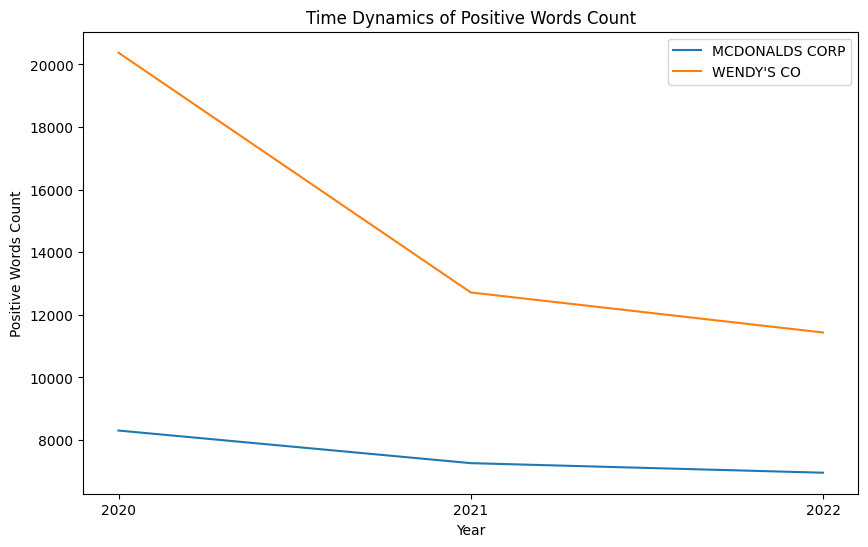

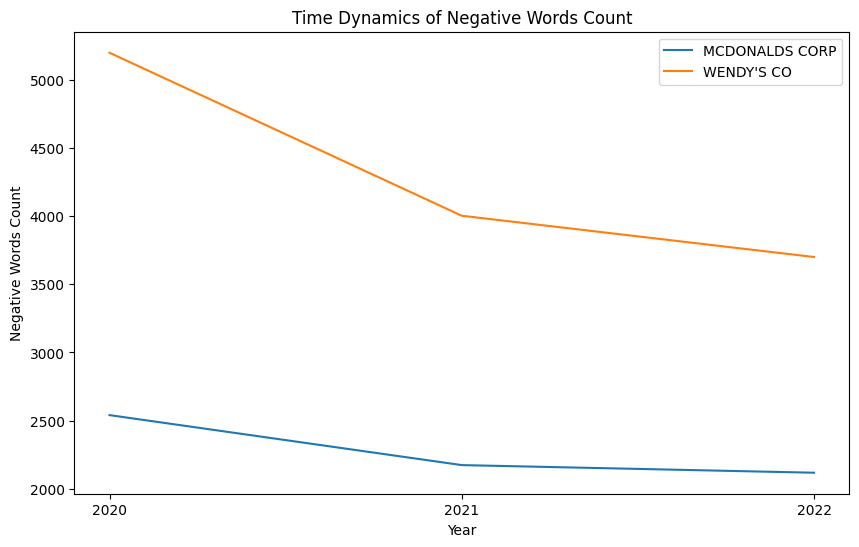

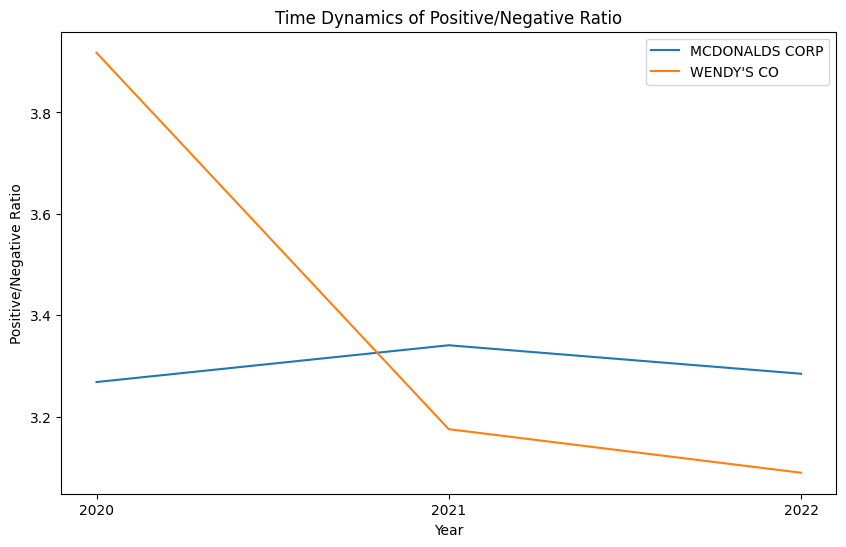

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for each company
mcd_data = sentiment_data[sentiment_data['Company'] == 'MCDONALDS CORP']
wendys_data = sentiment_data[sentiment_data['Company'] == "WENDY'S CO"]

mcd_data['Year'] = mcd_data['Year'].astype(int)
wendys_data['Year'] = wendys_data['Year'].astype(int)

# Set the figure size
plt.figure(figsize=(10, 6))

# Line chart for Positive Words Count
plt.plot(mcd_data['Year'], mcd_data['Positive Words Count'], label='MCDONALDS CORP')
plt.plot(wendys_data['Year'], wendys_data['Positive Words Count'], label="WENDY'S CO")
plt.xlabel('Year')
plt.ylabel('Positive Words Count')
plt.title('Time Dynamics of Positive Words Count')
plt.legend()
plt.xticks(mcd_data['Year'])
plt.show()

# Line chart for Negative Words Count
plt.figure(figsize=(10, 6))
plt.plot(mcd_data['Year'], mcd_data['Negative Words Count'], label='MCDONALDS CORP')
plt.plot(wendys_data['Year'], wendys_data['Negative Words Count'], label="WENDY'S CO")
plt.xlabel('Year')
plt.ylabel('Negative Words Count')
plt.title('Time Dynamics of Negative Words Count')
plt.legend()
plt.xticks(mcd_data['Year'])
plt.show()

# Line chart for Positive/Negative Ratio
plt.figure(figsize=(10, 6))
plt.plot(mcd_data['Year'], mcd_data['Positive/Negative Ratio'], label='MCDONALDS CORP')
plt.plot(wendys_data['Year'], wendys_data['Positive/Negative Ratio'], label="WENDY'S CO")
plt.xlabel('Year')
plt.ylabel('Positive/Negative Ratio')
plt.title('Time Dynamics of Positive/Negative Ratio')
plt.legend()
plt.xticks(mcd_data['Year'])
plt.show()

In [ ]:
readability_data

,Year,Company,Gunning Fog Index,Flesch Reading Ease
0,2020,MCDONALDS CORP,10.36,37.74
1,2021,MCDONALDS CORP,7.89,18.96
2,2022,MCDONALDS CORP,7.38,12.33
3,2020,WENDY'S CO,12.57,15.04
4,2021,WENDY'S CO,11.10,10.43
5,2022,WENDY'S CO,9.41,14.90


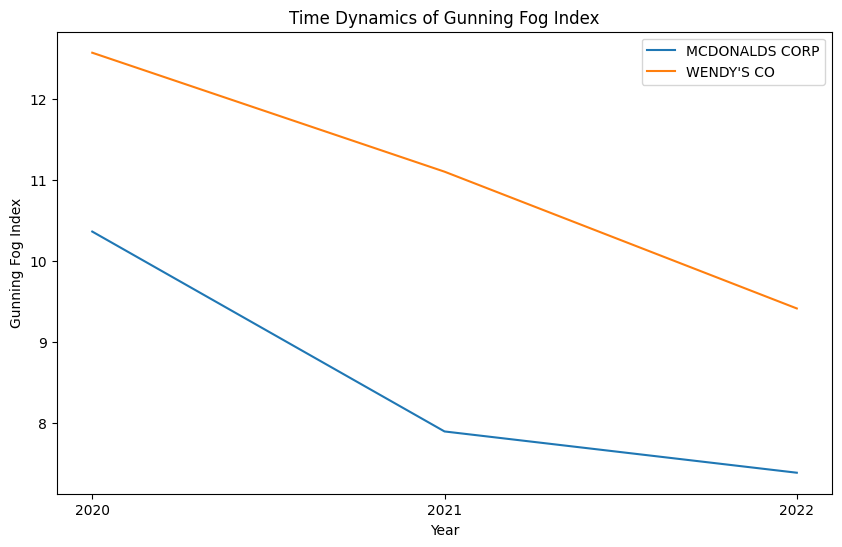

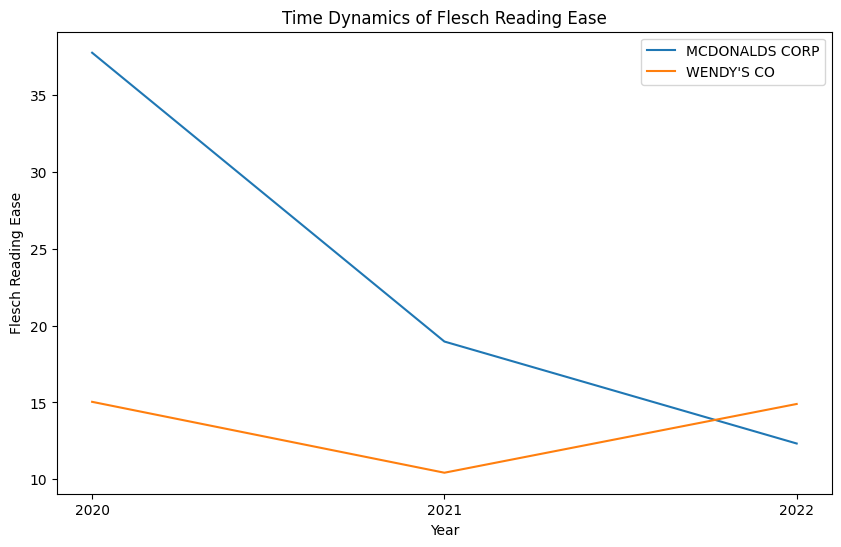

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for each company
mcd_data = readability_data[readability_data['Company'] == 'MCDONALDS CORP']
wendys_data = readability_data[readability_data['Company'] == "WENDY'S CO"]

mcd_data['Year'] = mcd_data['Year'].astype(int)
wendys_data['Year'] = wendys_data['Year'].astype(int)

# Set the figure size
plt.figure(figsize=(10, 6))

# Line chart for Gunning Fog Index
plt.plot(mcd_data['Year'], mcd_data['Gunning Fog Index'], label='MCDONALDS CORP')
plt.plot(wendys_data['Year'], wendys_data['Gunning Fog Index'], label="WENDY'S CO")
plt.xlabel('Year')
plt.ylabel('Gunning Fog Index')
plt.title('Time Dynamics of Gunning Fog Index')
plt.legend()
plt.xticks(mcd_data['Year'])
plt.show()

# Line chart for Flesch Reading Ease
plt.figure(figsize=(10, 6))
plt.plot(mcd_data['Year'], mcd_data['Flesch Reading Ease'], label='MCDONALDS CORP')
plt.plot(wendys_data['Year'], wendys_data['Flesch Reading Ease'], label="WENDY'S CO")
plt.xlabel('Year')
plt.ylabel('Flesch Reading Ease')
plt.title('Time Dynamics of Flesch Reading Ease')
plt.legend()
plt.xticks(mcd_data['Year'])
plt.show()

Analysis:

Textual Analysis of SEC Text files of the following 2 companies:

MCDONALD'S CORP (CIK: 63908)

WENDY'S CO (CIK: 30697)

The table shows count the number of COVID-19-related words: "covid-19", "covid", "coronavirus", "pandemic" for years 2020-2022 for each 10-K of both companies (MCDONALD'S CORP and WENDY'S CO).

I calculated two text readability indices but I am using Gunning Fog for interpretation.

Gunning Fog = 0.4((words/sentences) + 100 (complex words/words))

Complex words = words, containing three or more syllables

We can see that Mac Donald’s had lower values of Gunning Fog index in all years 2020-2022.

Hence, the SEC Text files (10-K Files) of Mac Donald’s are easier to read than that of Wendy’s.

The table shows the text sentiment analysis for each year by counting positive and negative words and then calculating the Sentiment Polarity by dividing the count of positive words by negative words.

The graph shows the time dynamics of the number of Positive words count for years 2020-2022 for both companies (MCDONALD'S CORP and WENDY'S CO).

The graph shows the time dynamics of the number of Negative words count for years 2020-2022 for both companies (MCDONALD'S CORP and WENDY'S CO).

The graph shows the time dynamics of the ratio Positive/Negative words count for years 2020-2022 for both companies (MCDONALD'S CORP and WENDY'S CO).

The graph shows the time dynamics of Gunning Fog index for years 2020-2022 for both companies (MCDONALD'S CORP and WENDY'S CO).

We can see that in 2020, Wendy’s had more positive Sentiment Polarity while in 2021 and 2022, Mac Donald’s had more positive Sentiment Polarity.

We can see that Wendy’s had the highest frequency of COVID-19-related words in all years 2020-2022.

___

### 4. Check the correlation of the number of COVID-19-related words, readability, sentiment, ROA and Annual stock returns. Provide a heatmap and short discussion of the correlations.

## Returns

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

#Requirement 2.4.2
df = pd.read_csv('crispy.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['year'] = df['date'].dt.year

df = df[df['TICKER'].isin(['MCD', 'WEN'])]

df = df[df['year'].isin([2020, 2021, 2022])]

dfy = df
# Group by 'TICKER' and 'year' and calculate annual returns
dfy_grouped = dfy.groupby(['TICKER', 'year']).agg({'PRC': ['first', 'last']})
dfy_grouped.columns = ['first_price', 'last_price']
dfy_grouped['annual_return'] = (dfy_grouped['last_price'] - dfy_grouped['first_price']) / dfy_grouped['first_price']

dfy_grouped

first_price  last_price  annual_return
TICKER year                                        
MCD    2020    200.78999   214.58000       0.068679
       2021    210.22000   268.07001       0.275188
       2022    268.57999   263.53000      -0.018803
WEN    2020     22.34000    21.92000      -0.018800
       2021     21.38000    23.85000       0.115529
       2022     23.89000    22.63000      -0.052742

In [ ]:
import pandas as pd

rddata = {
    'Year': [2020, 2021, 2022, 2020, 2021, 2022],
    'Company': ['MCDONALDS CORP', 'MCDONALDS CORP', 'MCDONALDS CORP', "WENDY'S CO", "WENDY'S CO", "WENDY'S CO"],
    'annual_return': [0.068679, 0.275188, -0.018803, -0.018800, 0.115529, -0.052742]
}

df = pd.DataFrame(rddata)

df

,Year,Company,annual_return
0,2020,MCDONALDS CORP,0.068679
1,2021,MCDONALDS CORP,0.275188
2,2022,MCDONALDS CORP,-0.018803
3,2020,WENDY'S CO,-0.018800
4,2021,WENDY'S CO,0.115529
5,2022,WENDY'S CO,-0.052742


In [ ]:
data

,Year,Company,Count_covid-19,Count_covid,Count_coronavirus,Count_pandemic
0,2020,MCDONALDS CORP,62,62,0,14
1,2021,MCDONALDS CORP,41,42,0,11
2,2022,MCDONALDS CORP,23,23,0,4
3,2020,WENDY'S CO,105,105,10,99
4,2021,WENDY'S CO,75,75,9,75
5,2022,WENDY'S CO,16,16,1,26


In [ ]:
readability_data

,Year,Company,Gunning Fog Index,Flesch Reading Ease
0,2020,MCDONALDS CORP,10.36,37.74
1,2021,MCDONALDS CORP,7.89,18.96
2,2022,MCDONALDS CORP,7.38,12.33
3,2020,WENDY'S CO,12.57,15.04
4,2021,WENDY'S CO,11.10,10.43
5,2022,WENDY'S CO,9.41,14.90


In [ ]:
sentiment_data

,Year,Company,Positive Words Count,Negative Words Count,Positive/Negative Ratio
0,2020,MCDONALDS CORP,8302,2540,3.268504
1,2021,MCDONALDS CORP,7260,2173,3.341003
2,2022,MCDONALDS CORP,6954,2117,3.284837
3,2020,WENDY'S CO,20376,5201,3.917708
4,2021,WENDY'S CO,12715,4004,3.175574
5,2022,WENDY'S CO,11435,3701,3.089705


In [ ]:
df

,Year,Company,first_price,last_price,annual_return
0,2020,MCDONALDS CORP,200.78999,214.58000,0.068679
1,2021,MCDONALDS CORP,210.22000,268.07001,0.275188
2,2022,MCDONALDS CORP,268.57999,263.53000,-0.018803
3,2020,WENDY'S CO,22.34000,21.92000,-0.018800
4,2021,WENDY'S CO,21.38000,23.85000,0.115529
5,2022,WENDY'S CO,23.89000,22.63000,-0.052742


Merging data:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Merge the dataframes based on 'Year' and 'Company'
merged_df = pd.merge(data, readability_data, on=['Year', 'Company'])
merged_df = pd.merge(merged_df, sentiment_data, on=['Year', 'Company'])
merged_df = pd.merge(merged_df, df, on=['Year', 'Company'])

# Select the variables for correlation analysis
variables = merged_df.drop(['Year', 'Company'], axis=1)

variables

,Count_covid-19,Count_covid,Count_coronavirus,Count_pandemic,Gunning Fog Index,Flesch Reading Ease,Positive Words Count,Negative Words Count,Positive/Negative Ratio,annual_return
0,62,62,0,14,10.36,37.74,8302,2540,3.268504,0.068679
1,41,42,0,11,7.89,18.96,7260,2173,3.341003,0.275188
2,23,23,0,4,7.38,12.33,6954,2117,3.284837,-0.018803
3,105,105,10,99,12.57,15.04,20376,5201,3.917708,-0.018800
4,75,75,9,75,11.10,10.43,12715,4004,3.175574,0.115529
5,16,16,1,26,9.41,14.90,11435,3701,3.089705,-0.052742


In [ ]:
variables.dtypes

Count_covid-19              object
Count_covid                 object
Count_coronavirus           object
Count_pandemic              object
Gunning Fog Index          float64
Flesch Reading Ease        float64
Positive Words Count        object
Negative Words Count        object
Positive/Negative Ratio    float64
annual_return              float64
dtype: object

In [ ]:
# Convert columns to numeric type
columns = ['Count_covid-19', 'Count_covid', 'Count_coronavirus', 'Count_pandemic', 'Positive Words Count', 'Negative Words Count']

for column in columns:
    variables[column] = pd.to_numeric(variables[column])

In [ ]:
# Calculate the correlation matrix
correlation_matrix = variables.corr()
correlation_matrix

,Count_covid-19,Count_covid,Count_coronavirus,Count_pandemic,Gunning Fog Index,Flesch Reading Ease,Positive Words Count,Negative Words Count,Positive/Negative Ratio,annual_return
Count_covid-19,1.000000,0.999929,0.824961,0.840656,0.868241,0.077024,0.761438,0.685909,0.740651,0.055848
Count_covid,0.999929,1.000000,0.822619,0.838356,0.864389,0.077623,0.758494,0.681978,0.742148,0.066374
Count_coronavirus,0.824961,0.822619,1.000000,0.984725,0.832511,-0.440158,0.872018,0.881694,0.556123,-0.147007
Count_pandemic,0.840656,0.838356,0.984725,1.000000,0.887183,-0.373179,0.938586,0.940120,0.619973,-0.197859
Gunning Fog Index,0.868241,0.864389,0.832511,0.887183,1.000000,0.062490,0.872204,0.880452,0.545837,-0.264360
Flesch Reading Ease,0.077024,0.077623,-0.440158,-0.373179,0.062490,1.000000,-0.301341,-0.352373,-0.054286,0.161610
Positive Words Count,0.761438,0.758494,0.872018,0.938586,0.872204,-0.301341,1.000000,0.973940,0.729566,-0.388795
Negative Words Count,0.685909,0.681978,0.881694,0.940120,0.880452,-0.352373,0.973940,1.000000,0.555886,-0.416312
Positive/Negative Ratio,0.740651,0.742148,0.556123,0.619973,0.545837,-0.054286,0.729566,0.555886,1.000000,-0.125718
annual_return,0.055848,0.066374,-0.147007,-0.197859,-0.264360,0.161610,-0.388795,-0.416312,-0.125718,1.000000


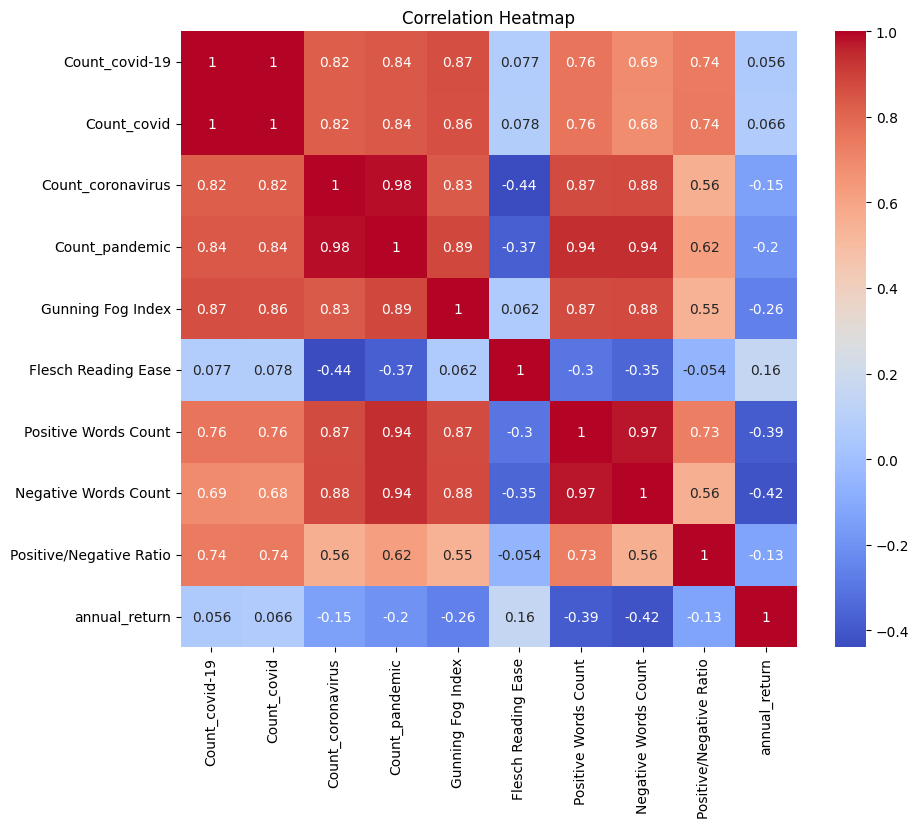

In [ ]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

This heatmap shows the correlation of the number of COVID-19-related words, readability, sentiment and ROA. The positive correlation exists between count of covid-19 related words with Sentiment Polarity. The Gunning Fog readability index has positive correlation with the count of covid-19 related words and the Sentiment Polarity.
Annual returns is moderately negatively correlated with Negative Word Count (-0.42).
Annual returns is weakly positively correlated with Flesch reading ease score (0.16).